In [0]:
################################################################### QUESTIONS S#######################################W#########################################

# EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
# Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot 
#  should give a visual identification of different clusters existing in the dataset) – 5 points
# Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)
# Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)


#####################################################################################################################################################################

In [0]:
import pandas as Pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import io
import numpy as np
  
## setting plot style 
# plt.style.use('fivethirtyeight') 
plt.style.use(['dark_background'])
plt.style.use(['ggplot'])

In [862]:

from google.colab import files
uploaded = files.upload()

Saving cars-dataset.csv to cars-dataset (3).csv


In [0]:
data_raw = Pd.read_csv(io.BytesIO(uploaded['cars-dataset.csv']))

In [864]:
print(data_raw.shape)
print(data_raw.info())


(398, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB
None


In [0]:
data_train = data_raw.copy(deep=True)

In [866]:
data_train.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [0]:
############################ Analysing hp column as it is Showing as object #########################################

In [868]:
data_train[~data_train['hp'].str.isalnum()]['hp'] ### checking the non alpha numeric values in hp column

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object

In [869]:
index_char = data_train[~data_train['hp'].str.isalnum()]['hp'].index
index_char.size

6

In [870]:
index_alnum = data_train[data_train['hp'].str.isalnum()]['hp'].index
index_alnum.size

392

In [0]:
mean = np.array(data_train.loc[index_alnum,'hp']).astype(int).mean() ## coverting string number to integer number

In [0]:


data_train['hp'].replace(data_train[~data_train['hp'].str.isalnum()]['hp'],mean,inplace=True)

In [873]:
data_train.loc[index_char,'hp']

32     104.469
126    104.469
330    104.469
336    104.469
354    104.469
374    104.469
Name: hp, dtype: object

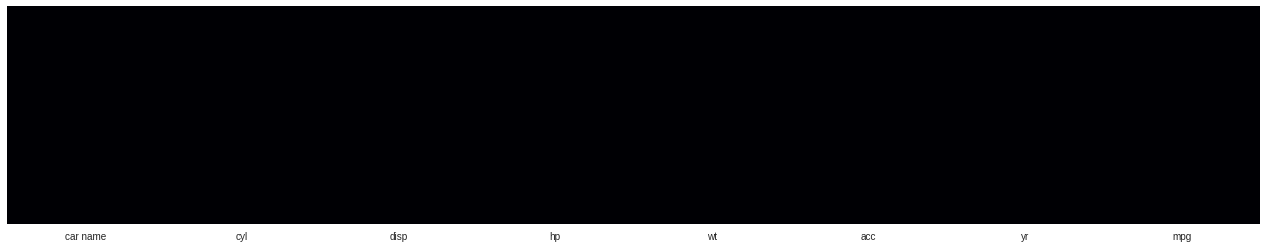

In [874]:

## finding the null and missing values in the database
plt.figure(figsize=(20,4))
plt.style.use(['seaborn-white'])
sns.heatmap(data_train.isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='inferno') 


In [0]:
data_train['hp'] = data_train['hp'].astype(np.float64)

In [876]:
data_train.head()

car name  cyl   disp     hp    wt   acc  yr   mpg
0  chevrolet chevelle malibu    8  307.0  130.0  3504  12.0  70  18.0
1          buick skylark 320    8  350.0  165.0  3693  11.5  70  15.0
2         plymouth satellite    8  318.0  150.0  3436  11.0  70  18.0
3              amc rebel sst    8  304.0  150.0  3433  12.0  70  16.0
4                ford torino    8  302.0  140.0  3449  10.5  70  17.0

In [877]:
data_train.describe().transpose()

count         mean         std  ...     50%       75%     max
cyl   398.0     5.454774    1.701004  ...     4.0     8.000     8.0
disp  398.0   193.425879  104.269838  ...   148.5   262.000   455.0
hp    398.0   104.469388   38.199187  ...    95.0   125.000   230.0
wt    398.0  2970.424623  846.841774  ...  2803.5  3608.000  5140.0
acc   398.0    15.568090    2.757689  ...    15.5    17.175    24.8
yr    398.0    76.010050    3.697627  ...    76.0    79.000    82.0
mpg   398.0    23.514573    7.815984  ...    23.0    29.000    46.6

[7 rows x 8 columns]

In [0]:
## we don't require column = car name  as it is not contributing to our prediction so dropping it

data_train_nw = data_train.drop(columns='car name',axis=1)

In [879]:
data_train_nw.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [880]:
data_train_nw.head(4)

cyl   disp     hp    wt   acc  yr   mpg
0    8  307.0  130.0  3504  12.0  70  18.0
1    8  350.0  165.0  3693  11.5  70  15.0
2    8  318.0  150.0  3436  11.0  70  18.0
3    8  304.0  150.0  3433  12.0  70  16.0

In [0]:
########################## Checking the distribution of each attributes through Boxplot and Distribution graph  ###########################################

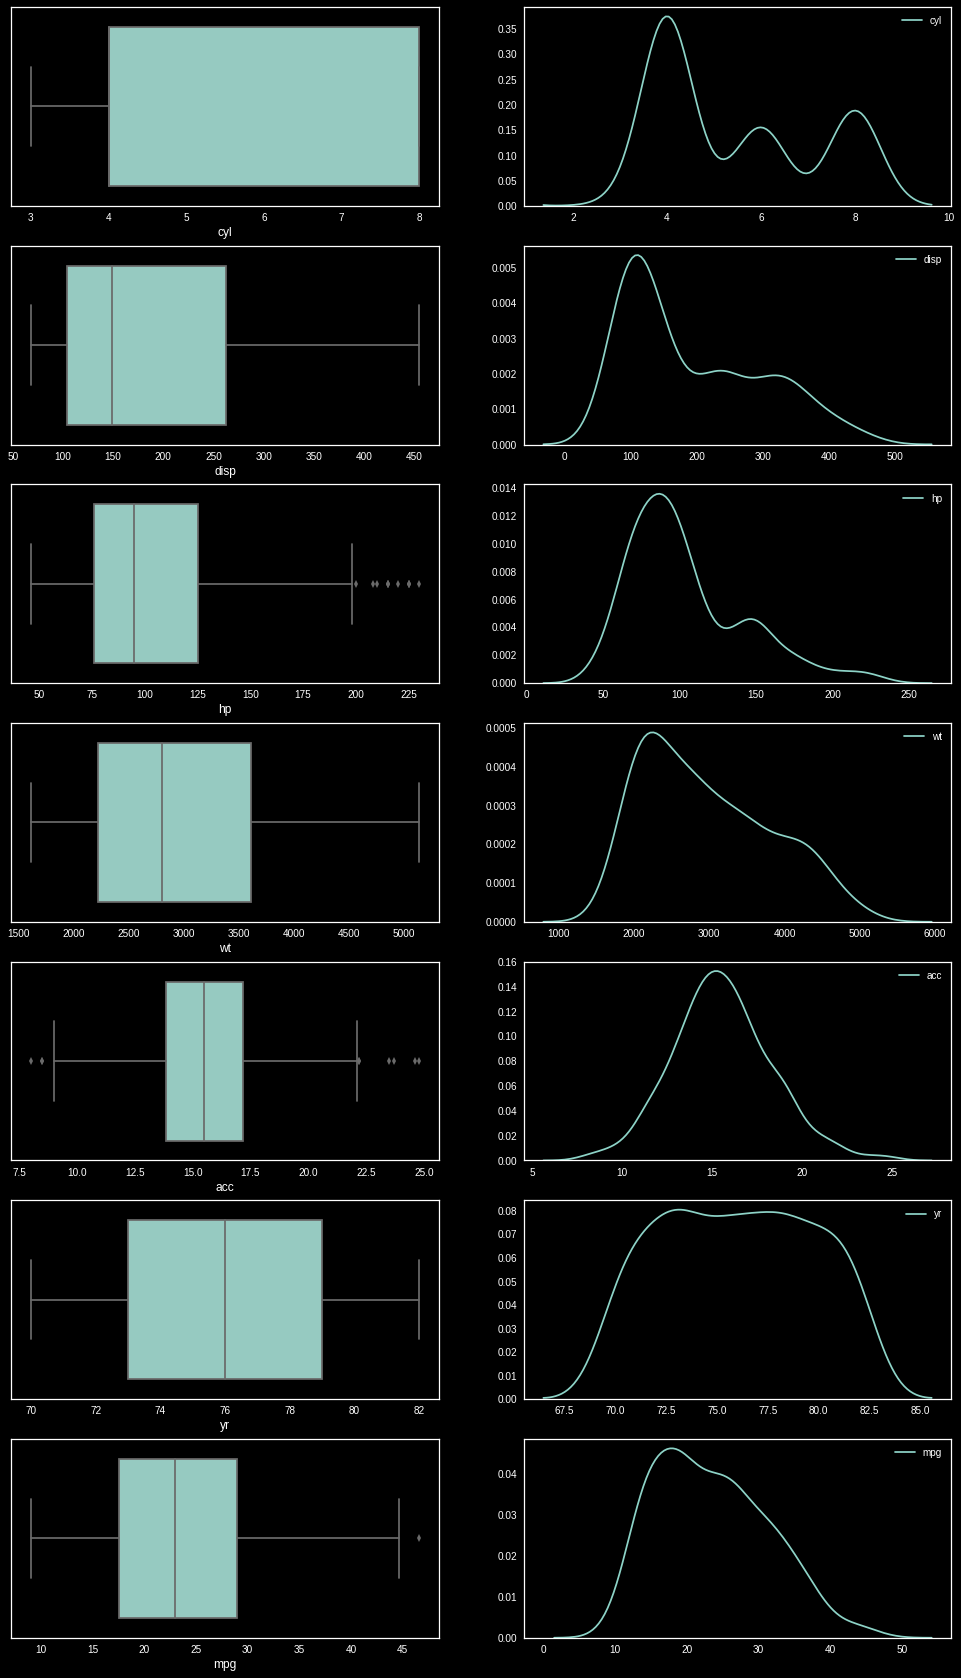

In [882]:
plt.style.use(['dark_background'])



## setting plot style 
#plt.style.use('fivethirtyeight') 

col_d = data_train_nw.select_dtypes(exclude=['object']).columns
col=2
row = int(np.ceil(len(data_train_nw.select_dtypes(exclude=['object']).columns)))
fig, qaxis = plt.subplots(row,col,figsize=(15,30))

i=0
j=0
k=0

for i in range (len(col_d)):
  ## plotting line for zero residual error 
  plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 
  ax1= sns.boxplot(x=data_train_nw[col_d[i]], ax = qaxis[j,k]) 
  k=k+1
  
  ax2=sns.kdeplot(data_train_nw[col_d[i]],ax = qaxis[j,k]) 
  k=k+1
  j=j
  if k==col:
    j=j+1
    k=0   
   

In [0]:
## we have outliers in acc and mpg columns

In [0]:
#### there are  three clusters showing in the cyl colun
## there are two minor clusters in the disp column

In [0]:
### Checking in the pairplot

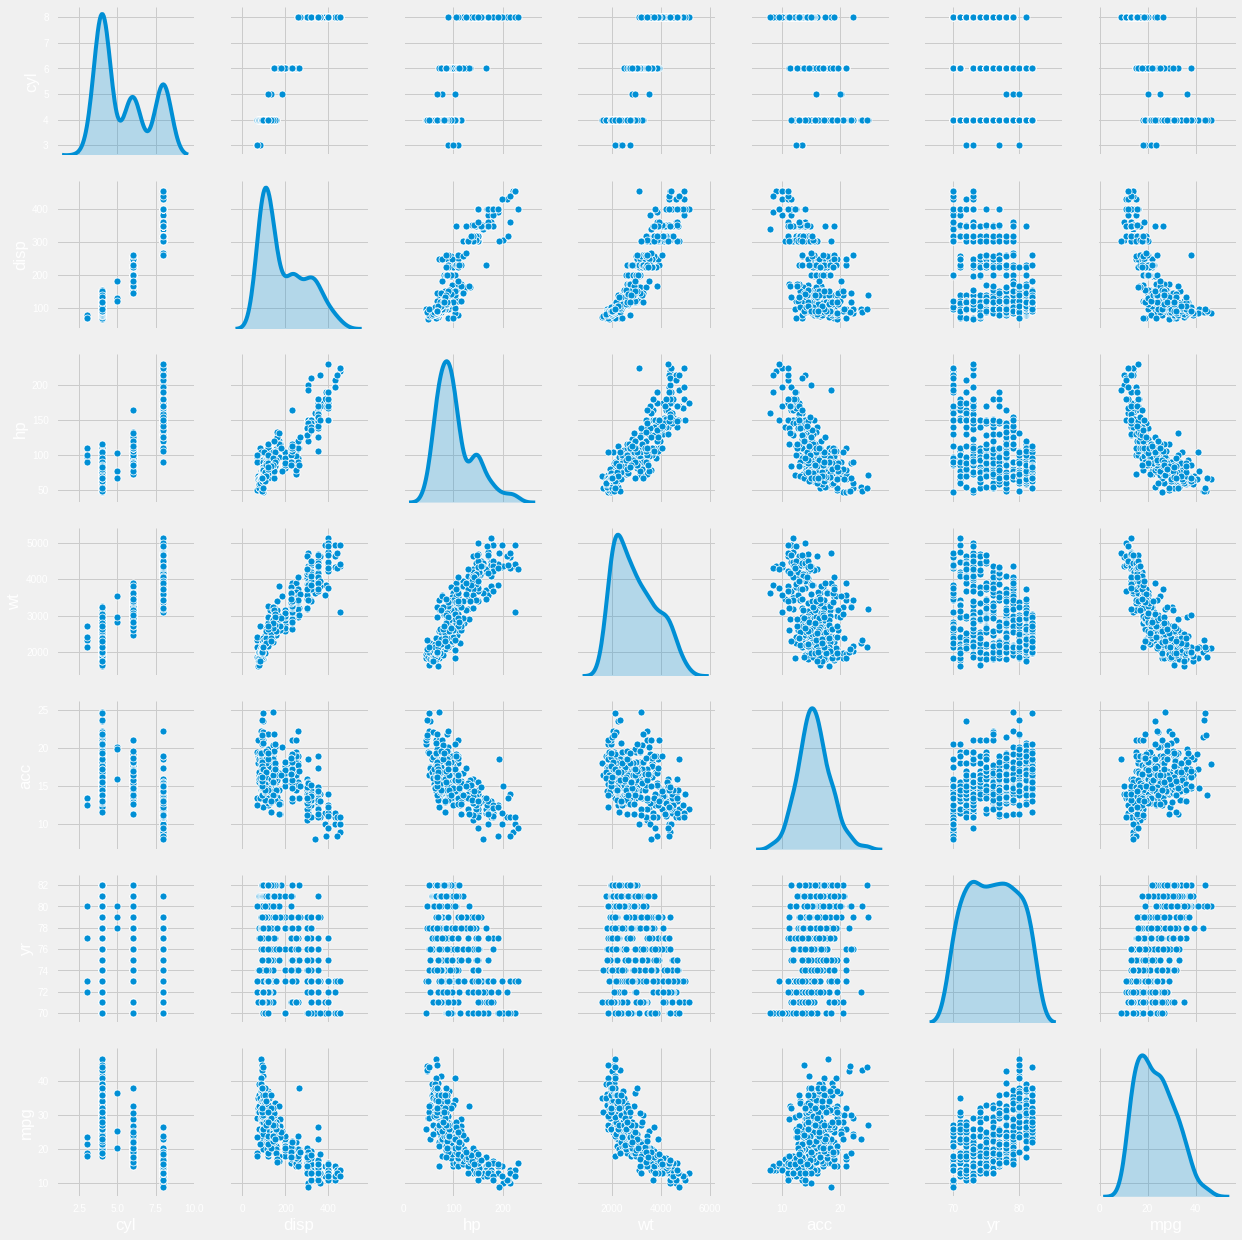

In [886]:
plt.style.use('fivethirtyeight')

sns.pairplot(data_train_nw,diag_kind='kde')

In [0]:
##  We can have 3 -4 Clusters as per the KDE plot with cyl and disp column

Text(0.5, 0, '   hp')

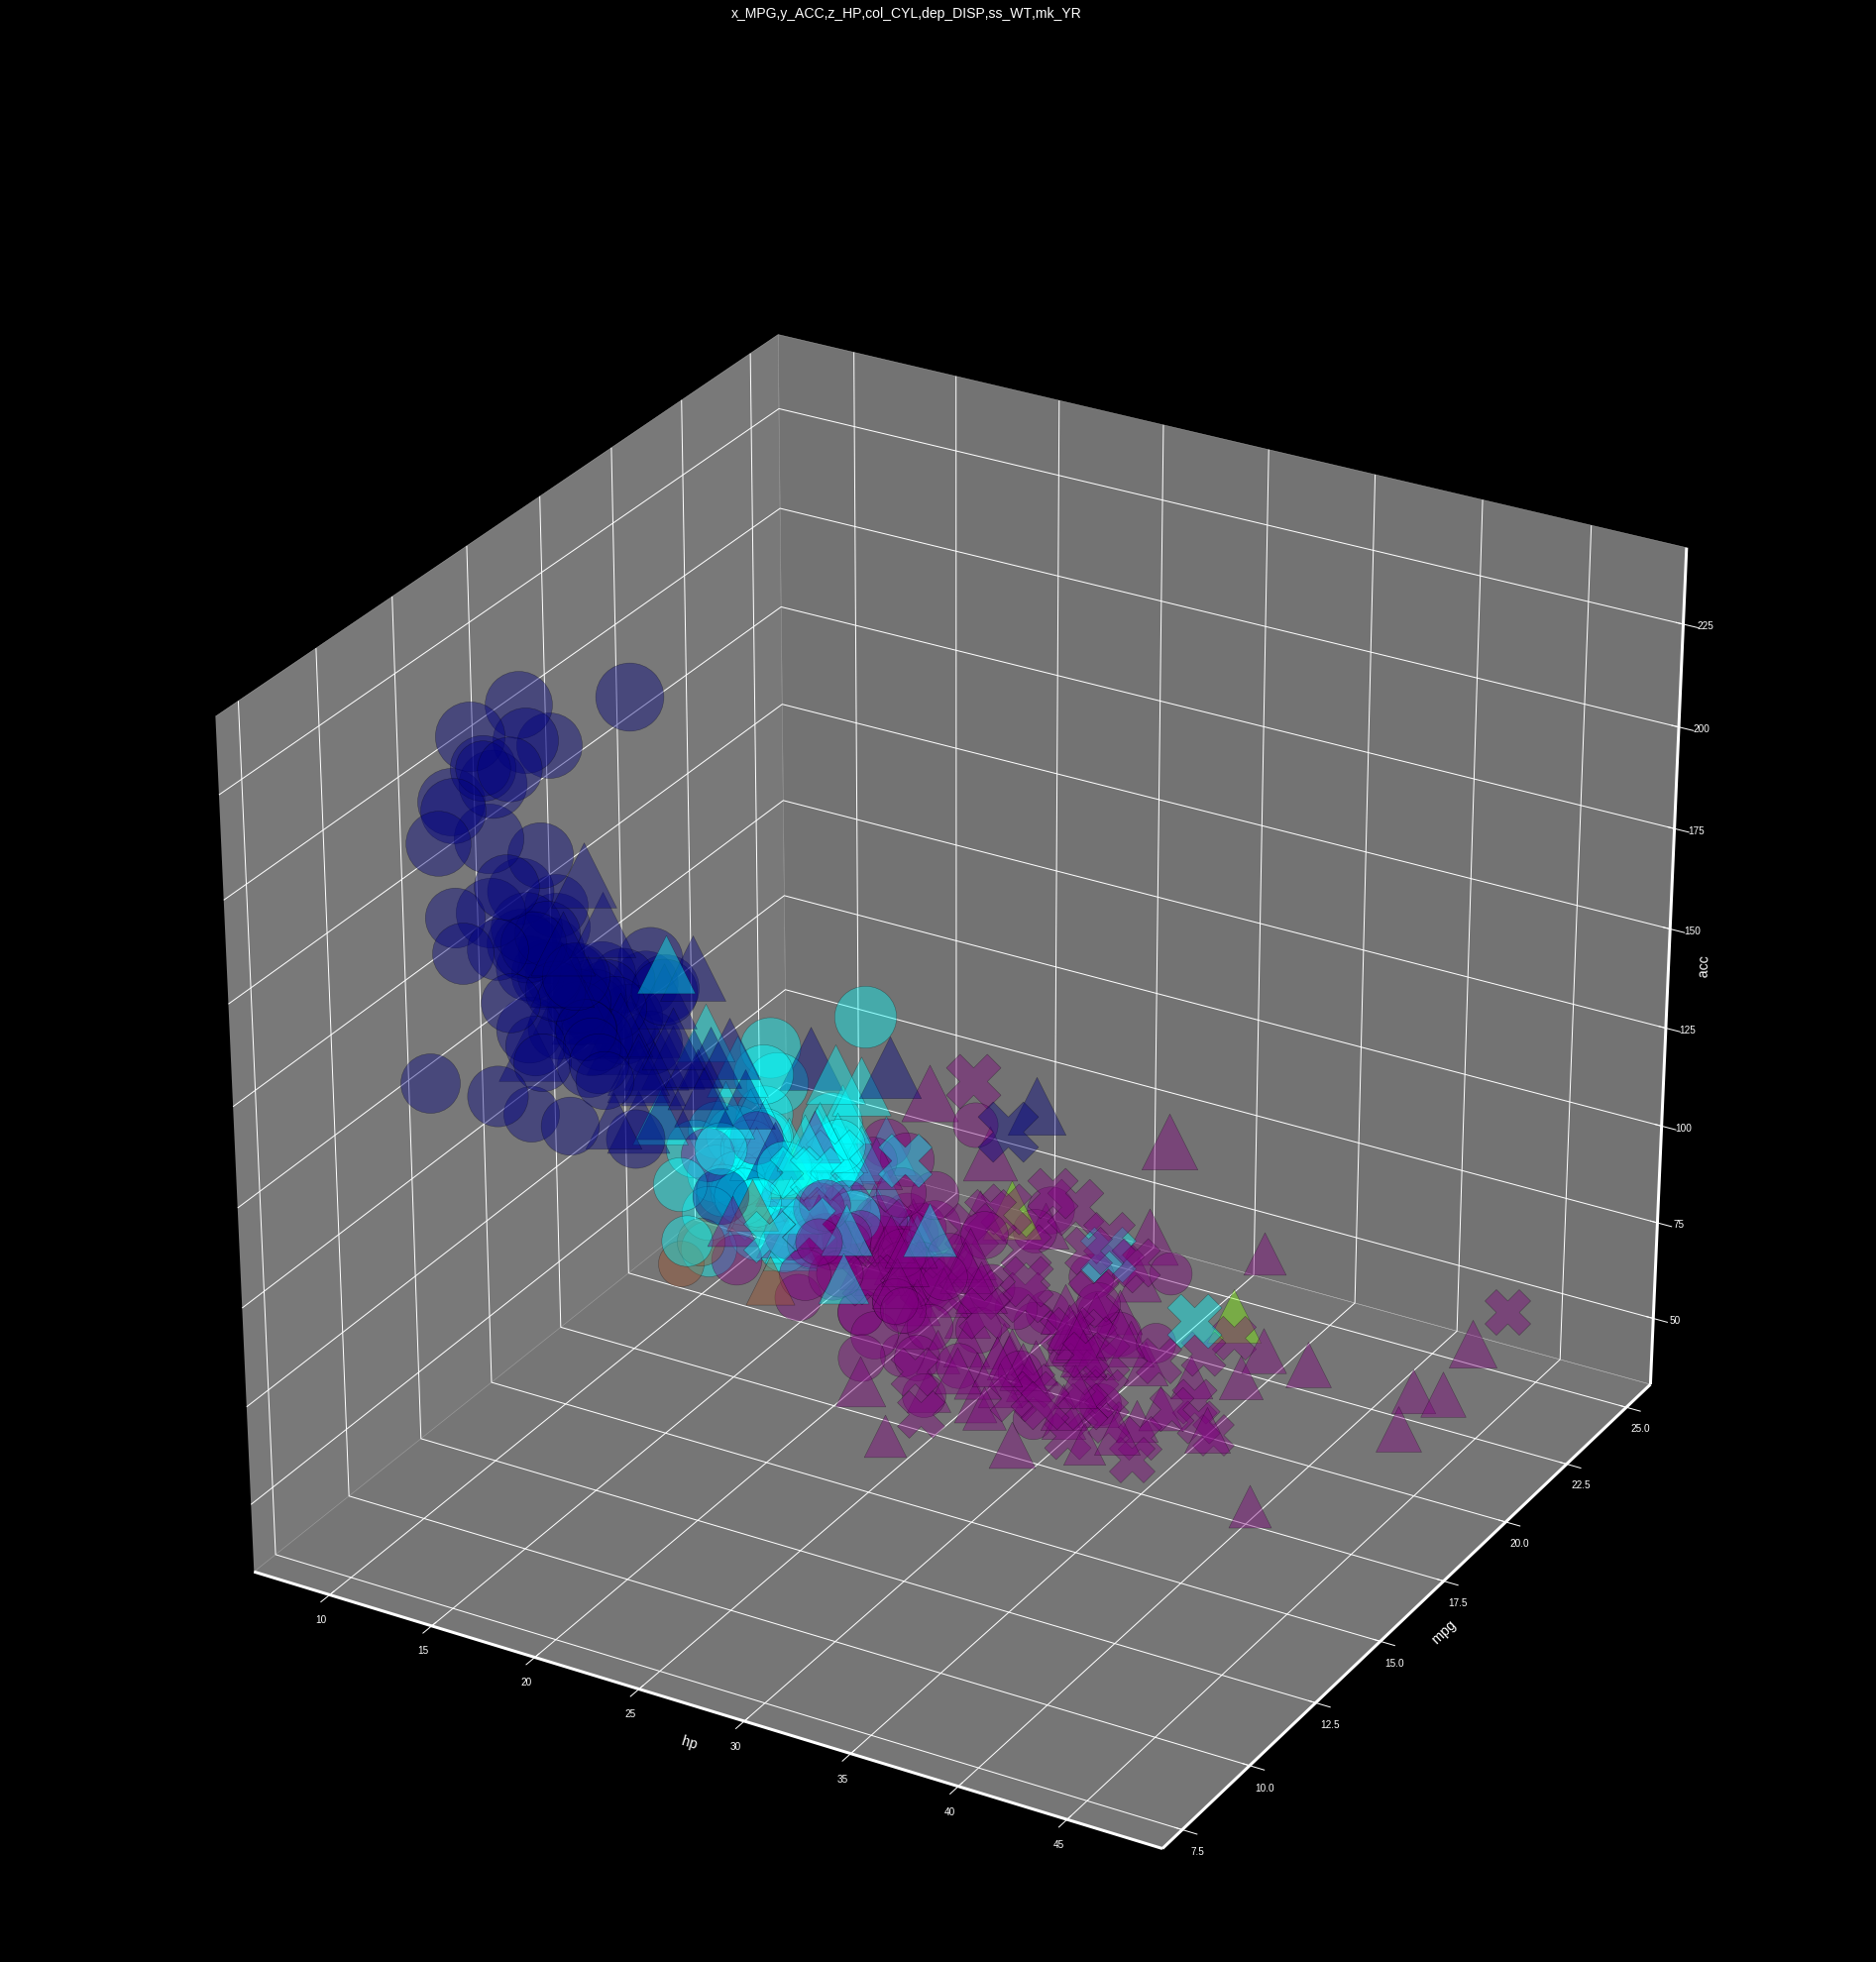

In [888]:
# Visualizing 6-D mix data using scatter plots
# To use  hue,depth, size and shape

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## %matplotlib notebook
# plt.style.use('fivethirtyeight') 
plt.style.use(['dark_background'])
fig = plt.figure(figsize=(30,30))
##fig = plt.figure(figsize=(25,25))
t = fig.suptitle('x_MPG,y_ACC,z_HP,col_CYL,dep_DISP,ss_WT,mk_YR', fontsize=14)  
ax = fig.add_subplot(111, projection='3d')

xs = list(data_train_nw['mpg'])
ys = list(data_train_nw['acc'])
zs = list(data_train_nw['hp'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

##  https://www.rapidtables.com/web/color/RGB_Color.html#color-table

ss =  list(data_train_nw['wt'])

colors = ['sienna' if cyl == 3 else 'Purple' if cyl ==4 else '#7CFC00' if cyl ==5 else 'Aqua' if cyl == 6 else 'Navy' for cyl in list(data_train_nw['cyl'])] 


## 3,4,5,6,8
markers = ['o' if q <=75 else '^' if ( q > 75 and q <= 80 ) else 'X' for q in list(data_train_nw['yr'])] 

for data, color , size , mark in zip(data_points, colors , ss , markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size , marker=mark)

ax.set_ylabel('   mpg', fontsize=14)
ax.set_zlabel('   acc', fontsize=14)
ax.set_xlabel('   hp', fontsize=14)

##  ON THE X AXIS WE HAVE MPG , Y AXIS WE HAVE HP , Z AXIS WE HAVE HP , CLOLOR LEGEND FOR CYL ATTRIBUTE , COLOR DEPTH FOR DISP COLUMN , SIZES OF THE DATAPOINT AS WT AND 
##  DIFFERENT SHAPES AS THE YEAR COLUMN



In [0]:
data_train_nw_out = data_train_nw.copy(deep=True)

In [0]:
############################################### Checking the Outliers ################################################################################

In [891]:
################################ OUTLIERS DETECTION #################################
out_compare = Pd.DataFrame(columns=['Column_name'])

col=data_train_nw_out.select_dtypes(exclude='object').columns

for i in range(len(col)):
  
  factor=2
  upper_lmt=data_train_nw_out[col[i]].mean()+data_train_nw_out[col[i]].std()*factor
  lower_lmt=data_train_nw_out[col[i]].mean()-data_train_nw_out[col[i]].std()*factor
  out_compare.loc[i,'Column_name']=col[i]
  out_compare.loc[i,'upper_lmt']=upper_lmt
  out_compare.loc[i,'lower_lmt']=lower_lmt
  out_compare.loc[i,'upper_outlier(%)']='{0:=5.2f} %'.format((data_train_nw_out[(data_train_nw_out[col[i]]>upper_lmt)==True][col[i]].count()/data_train_nw_out[col[i]].count())*100)
  out_compare.loc[i,'lower_outlier(%)']='{0:<5.2f} %'.format((data_train_nw_out[(data_train_nw_out[col[i]]<lower_lmt)==True][col[i]].count()/data_train_nw_out[col[i]].count())*100)


out_compare = out_compare.sort_values(by=['upper_outlier(%)','lower_outlier(%)'],ascending=False)
out_compare.set_index('Column_name',inplace=True)
out_compare

#Capping the outlier rows with Percentiles
#upper_lim = data['column'].quantile(.95)
#lower_lim = data['column'].quantile(.05)

upper_lmt    lower_lmt upper_outlier(%) lower_outlier(%)
Column_name                                                            
hp            180.867763    28.071013           4.27 %          0.00  %
acc            21.083468    10.052713           2.76 %          2.51  %
wt           4664.108172  1276.741075           2.76 %          0.00  %
mpg            39.146541     7.882604           2.51 %          0.00  %
disp          401.965556   -15.113797           2.26 %          0.00  %
cyl             8.856782     2.052765           0.00 %          0.00  %
yr             83.405304    68.614797           0.00 %          0.00  %

In [892]:
#################### OUTLIERS TREATMENT and Verifying it after the treatment  ##############################################

col=data_train_nw_out.select_dtypes(exclude='object').columns
out_fx_compare = Pd.DataFrame(columns=['Column_name'])

for i in range(len(col)):
  #repl_value = out_compare.loc[col[i],'upper_lmt']
  repl_value = data_train_nw_out[col[i]].mean()
  #print('column {}:- has mean value {}'.format(col[i],repl_value))
  data_train_nw_out[col[i]].replace(data_train_nw_out[(data_train_nw_out[col[i]]>out_compare.loc[col[i],'upper_lmt'])==True][col[i]],repl_value,inplace=True)  ## value replacement
  #data_train[col[i]].replace(data_train[(data_train[col[i]]<out_compare.loc[col[i],'lower_lmt'])==True][col[i]],repl_value,inplace=True)  ## value replacement
  
  out_fx_compare.loc[i,'Column_name']=col[i]
  out_fx_compare.loc[i,'upper_lmt_old']=out_compare.loc[col[i],'upper_lmt']
  out_fx_compare.loc[i,'lower_lmt_old']=out_compare.loc[col[i],'lower_lmt']
  out_fx_compare.loc[i,'upper_outlier_nw(%)']='{0:=5.2f} %'.format((data_train_nw_out[(data_train_nw_out[col[i]]>out_compare.loc[col[i],'upper_lmt'])==True][col[i]].count()/data_train_nw_out[col[i]].count())*100)
  out_fx_compare.loc[i,'lower_outlier_nw(%)']='{0:<5.2f} %'.format((data_train_nw_out[(data_train_nw_out[col[i]]<out_compare.loc[col[i],'lower_lmt'])==True][col[i]].count()/data_train_nw_out[col[i]].count())*100)
 
out_fx_compare = out_fx_compare.sort_values(by=['upper_lmt_old'],ascending=False)
out_fx_compare.set_index('Column_name',inplace=True)
out_fx_compare


upper_lmt_old  ...  lower_outlier_nw(%)
Column_name                 ...                     
wt             4664.108172  ...              0.00  %
disp            401.965556  ...              0.00  %
hp              180.867763  ...              0.00  %
yr               83.405304  ...              0.00  %
mpg              39.146541  ...              0.00  %
acc              21.083468  ...              2.51  %
cyl               8.856782  ...              0.00  %

[7 rows x 4 columns]

In [0]:
#################################### COMPARING BEFORE AND AFTER OUTLIER FIXING #########################################

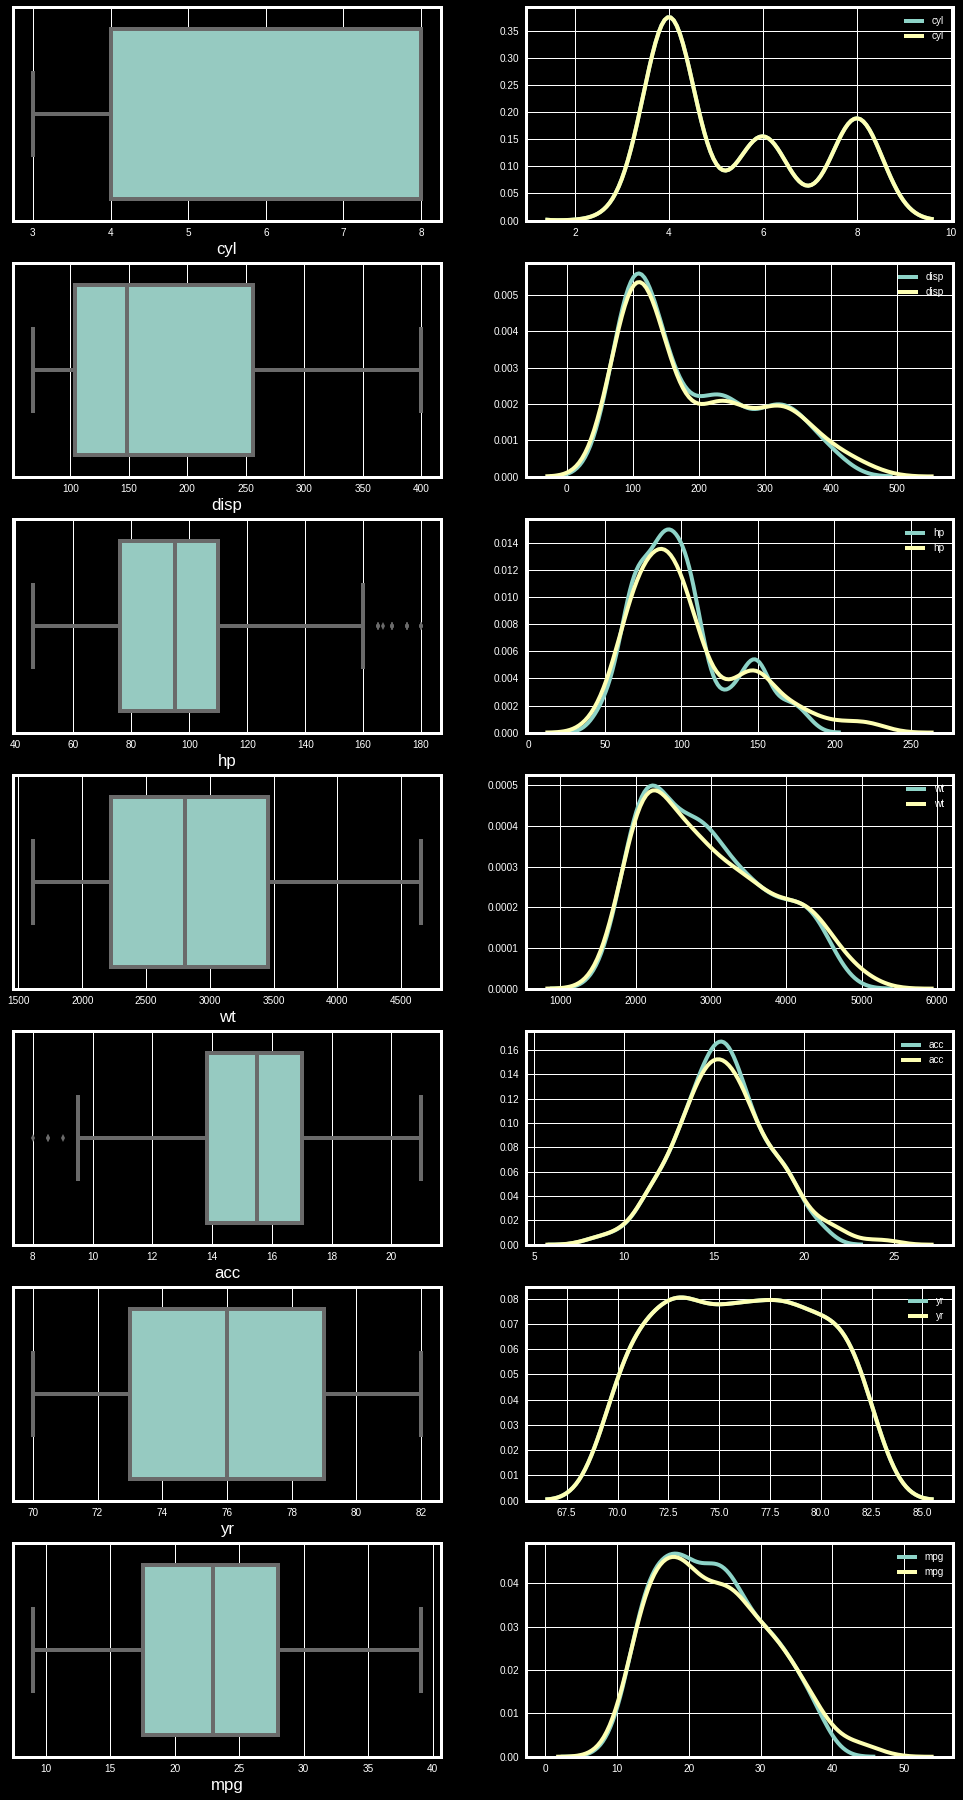

In [894]:
col_d = data_train_nw_out.select_dtypes(exclude=['object']).columns
col=2
row = int(np.ceil(len(data_train_nw_out.select_dtypes(exclude=['object']).columns)))
fig, qaxis = plt.subplots(row,col,figsize=(15,30))

i=0
j=0
k=0

for i in range (len(col_d)):
  
  ## plotting line for zero residual error 
  plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 
  
  ax1= sns.boxplot(x=data_train_nw_out[col_d[i]], ax = qaxis[j,k]) 
  k=k+1
  
  ax2=sns.kdeplot(data_train_nw_out[col_d[i]],ax = qaxis[j,k])       ## dataset after outlier treatment
  ax2=sns.kdeplot(data_train_nw[col_d[i]],ax = qaxis[j,k])  ## dataset before outlier treatment
  k=k+1
  j=j
  if k==col:
    j=j+1
    k=0   
   

Text(0.5, 0, '   hp')

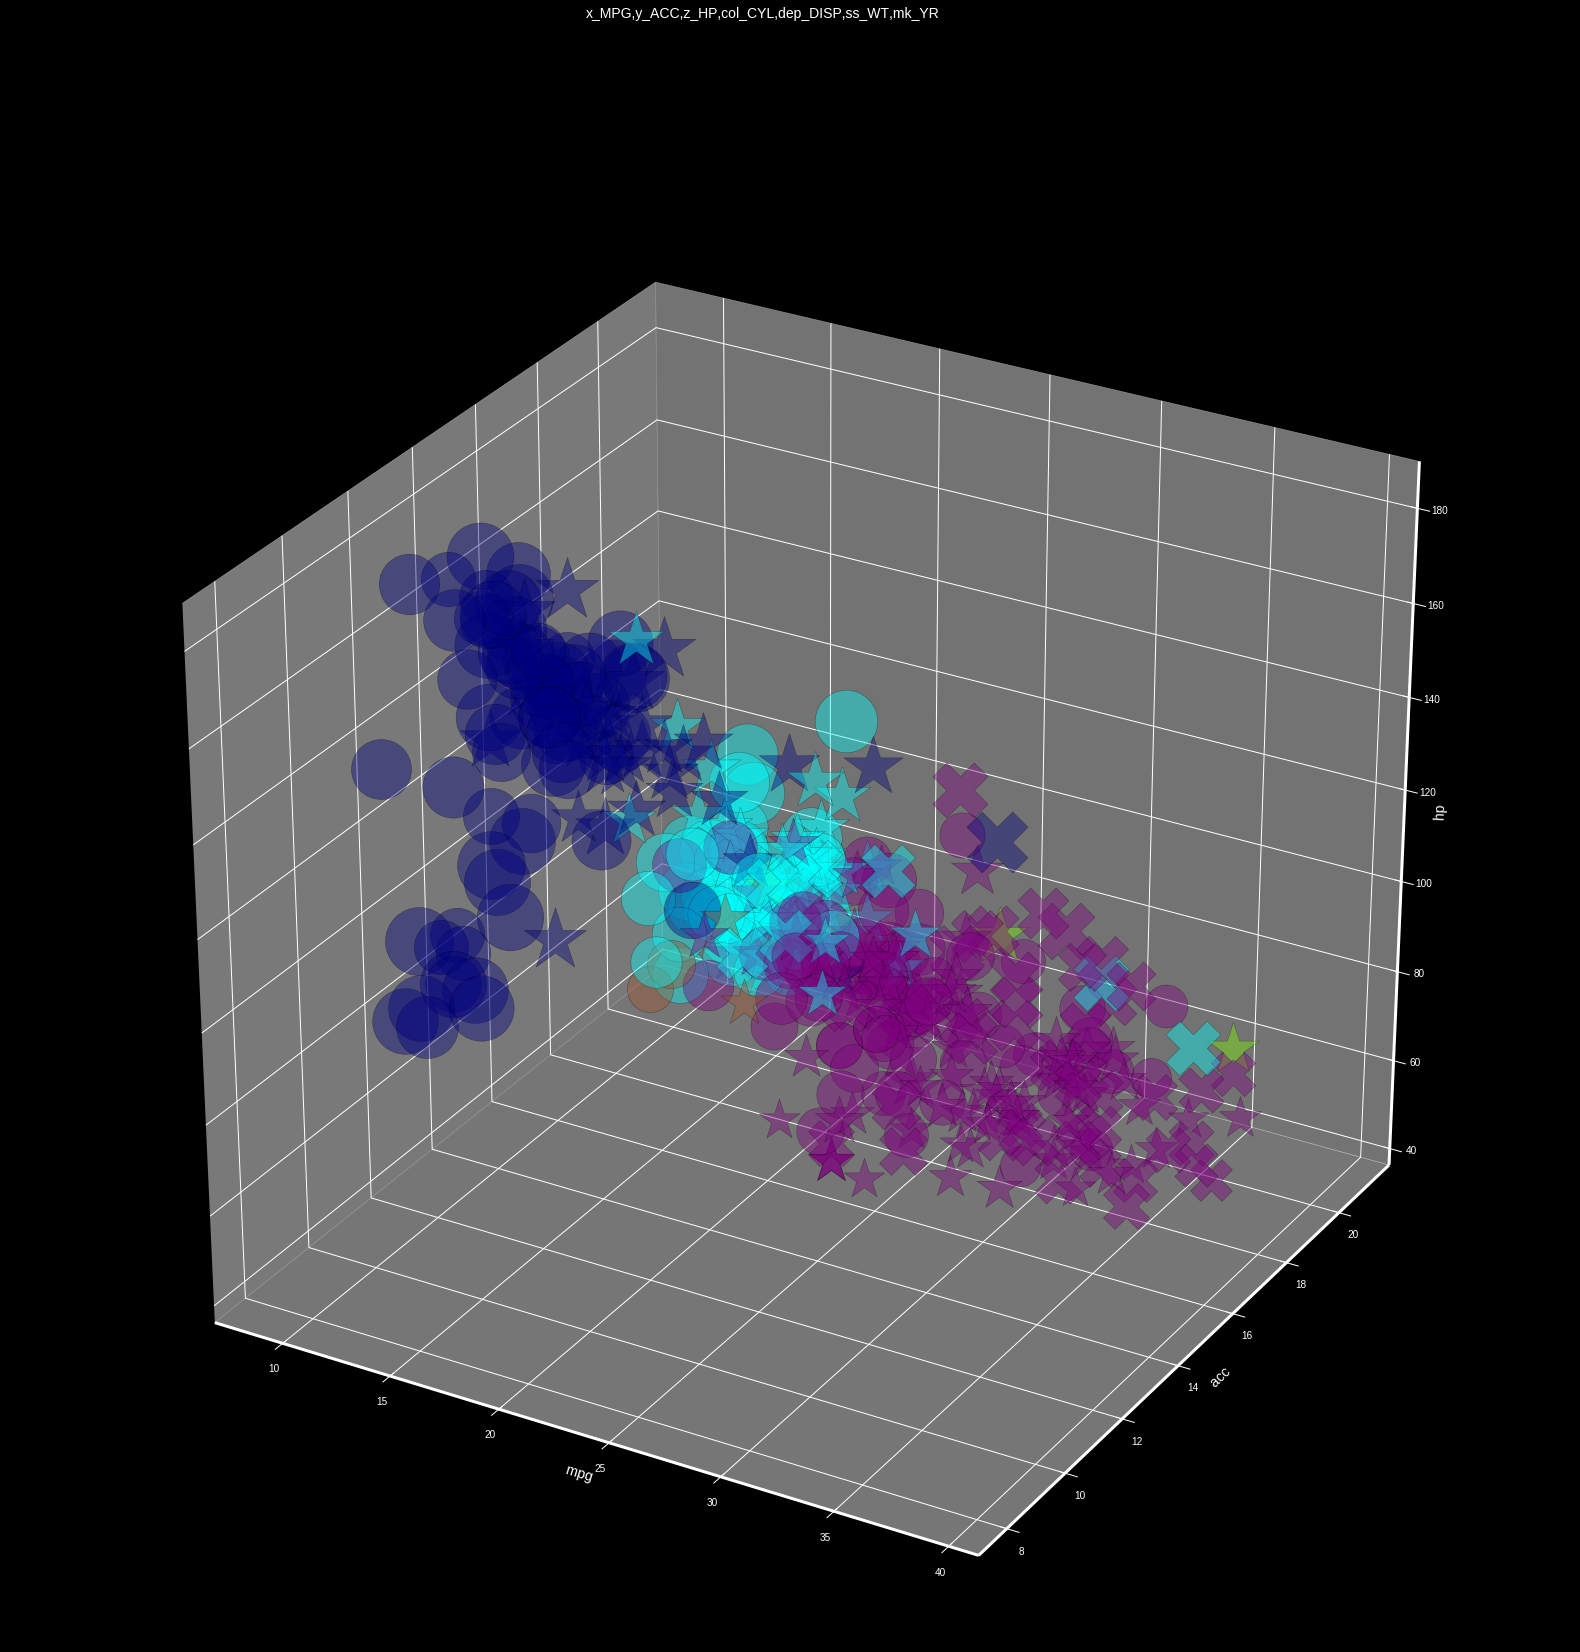

In [895]:
# Visualizing 6-D mix data using scatter plots
# To use  hue,depth, size and shape 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# plt.style.use('fivethirtyeight') 
plt.style.use(['dark_background'])

fig = plt.figure(figsize=(25,25))
t = fig.suptitle('x_MPG,y_ACC,z_HP,col_CYL,dep_DISP,ss_WT,mk_YR', fontsize=14)  
ax = fig.add_subplot(111, projection='3d')

xs = list(data_train_nw_out['mpg'])
ys = list(data_train_nw_out['acc'])
zs = list(data_train_nw_out['hp'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

##  "#1f77b4"[Dark Blue], "#ff7f0e"[orange], "#2ca02c"[dark green], "#d62728"[red], "#9467bd"[violet], "#8c564b"[Brown], "#e377c2"[magenta], "#7f7f7f"[grey]
## , "#bcbd22"[light green], "#17becf[light blue]"

ss =  list(data_train_nw_out['wt'])
colors = ['sienna' if cyl == 3 else 'Purple' if cyl ==4 else '#7CFC00' if cyl ==5 else 'Aqua' if cyl == 6 else 'Navy' for cyl in list(data_train_nw_out['cyl'])]
## 3,4,5,6,8
markers = ['o' if q <=75 else '*' if ( q > 75 and q <= 80 ) else 'X' for q in list(data_train_nw_out['yr'])] 

for data, color , size , mark in zip(data_points, colors , ss , markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size , marker=mark)

ax.set_xlabel('   mpg', fontsize=14)
ax.set_ylabel('   acc', fontsize=14)
ax.set_zlabel('   hp', fontsize=14)




In [0]:
#################### 3- Correlation Matrix with Heatmap ####################################
plt.style.use('ggplot') 

#correlation heatmap of dataset
def correlation_heatmap(df):
    fig , ax = plt.subplots(figsize =(15,10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(df.corr(),cmap = colormap,square=True,cbar_kws={'shrink':.5 }, ax=ax,annot=True,linewidths=0.1,vmax=0.3, linecolor='white',annot_kws={'fontsize':12 } )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

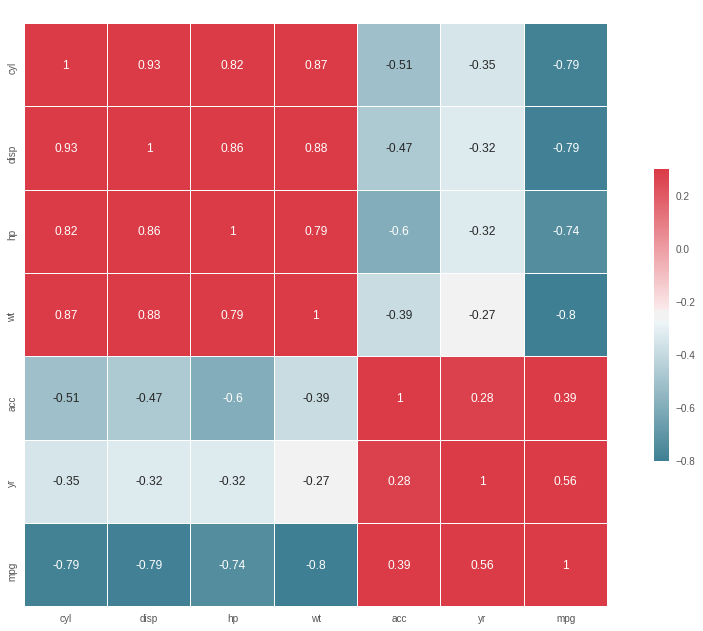

In [897]:
correlation_heatmap(data_train_nw_out)

In [0]:
## in above correlation matrix we have disp vs cyl , hp vs disp,cyl , wt vs cyl , disp,hp as highly correlated, we can drop it later

In [899]:
data_train_nw_out.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [0]:
############################### FEATURE SCALING ###########################

from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = MinMaxScaler()

data_train_z = scaler.fit_transform(data_train_nw_out)


data_train_z = Pd.DataFrame(data_train_z,columns=list(data_train_nw_out))

# data_train_z = data_train.apply(zscore)

**KMeans Clustering**

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [902]:
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
silhouette_scr =[]
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(data_train_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
  silhouette_avg = silhouette_score(data_train_z, labels)
  silhouette_scr.append(silhouette_avg)
  
clusters_df = Pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "silhouette_avg": silhouette_scr} )
clusters_df

num_clusters  cluster_errors  silhouette_avg
0             2       89.643673        0.461437
1             3       67.231838        0.371695
2             4       49.931644        0.367704
3             5       44.864085        0.334646

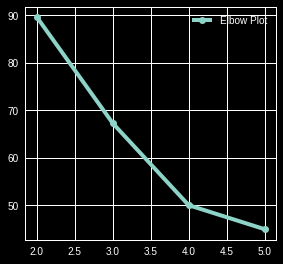

In [903]:
# Elbow plot for the cluster_errors
# plt.style.use('fivethirtyeight') 
plt.style.use(['dark_background'])
plt.figure(figsize=(4,4))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" ,label='Elbow Plot')
plt.legend()

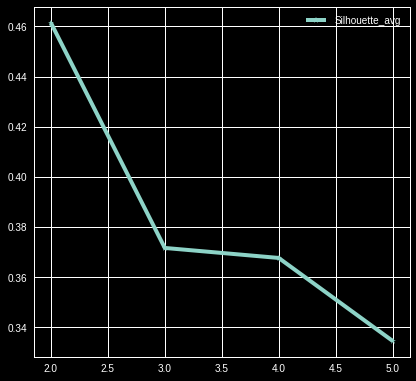

In [904]:
# Elbow plotfor the silhouette_avg
# plt.style.use('fivethirtyeight') 
plt.style.use(['dark_background'])
plt.figure(figsize=(6,6))
plt.plot( clusters_df.num_clusters, clusters_df.silhouette_avg, marker = "*" ,label='Silhouette_avg')
plt.legend()

For n_clusters = 2 The average silhouette_score is : 0.6016722759395621


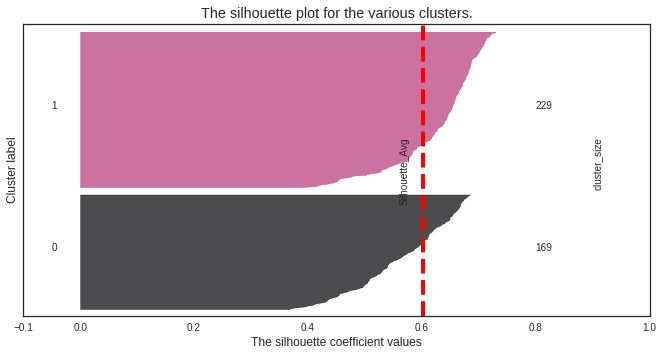

For n_clusters = 3 The average silhouette_score is : 0.6542143246549783


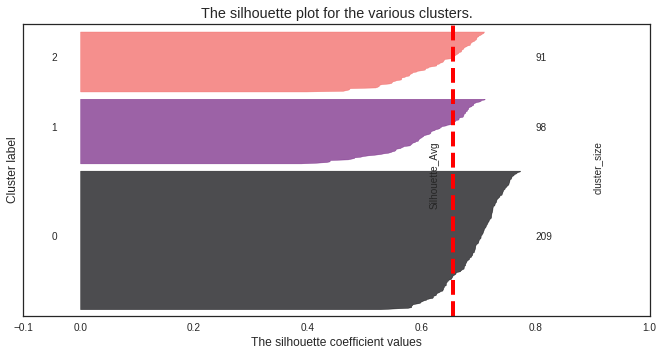

For n_clusters = 4 The average silhouette_score is : 0.6695249656563741


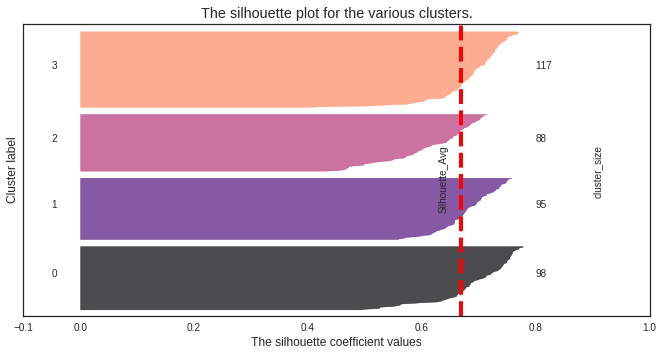

For n_clusters = 5 The average silhouette_score is : 0.6640054762944458


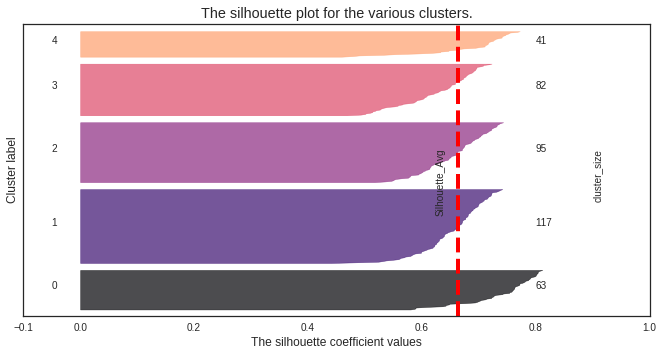

In [905]:
range_n_clusters = range( 2, 6)
plt.style.use('seaborn-white')

for n_clusters in range_n_clusters:
  
    data_train_z_nw = data_train_z.copy(deep = True) 
    
   
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10,5)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_train_z_nw) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_train_z_nw)
    
    clusterer.fit(data_train_z_nw)

    prediction=clusterer.predict(data_train_z_nw)  ## predicting the derived cluster value to each datapoint
    data_train_z_nw["Labels_KM"] = prediction # Creating a new column "Labels_KM" which will hold the cluster id of each record
    cnt_df = data_train_z_nw.groupby("Labels_KM").count()
    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_train_z_nw, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_train_z_nw, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values =  sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.get_cmap('magma')(float(i) / n_clusters) ## Spectral, inferno , plasma , viridis , magma , cividis 
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
        
        

        
        cluster_size = str(cnt_df.loc[i,'mpg'])
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Label the silhouette plots with their cluster size at the middle
        
        ax1.text(0.8, y_lower + 0.5 * size_cluster_i, cluster_size)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples 
        
    ax1.text(0.9,250, "cluster_size",rotation=90) 
    ax1.text(silhouette_avg-0.04,250, "Silhouette_Avg",rotation=90)
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

    plt.show()
    

In [0]:
# The elbow plot confirms our visual analysis that there are likely 4 good clusters - Balanced
# Let us start with 4 clusters

In [0]:
data_train_z_nw = data_train_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [908]:
cluster = KMeans( n_clusters =4, random_state = 2354 )
cluster.fit(data_train_z_nw)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [909]:
data_train_z_nw.shape

(398, 7)

In [910]:
centroids = cluster.cluster_centers_
centroids.shape

(4, 7)

In [911]:
centroid_df = Pd.DataFrame(centroids, columns = list(data_train_z_nw) )
centroid_df

cyl      disp        hp        wt       acc        yr       mpg
0  0.193684  0.115679  0.267201  0.225458  0.633500  0.290351  0.545550
1  0.618182  0.461254  0.416254  0.530690  0.641755  0.498106  0.354009
2  0.210256  0.136958  0.236247  0.239600  0.629263  0.838319  0.719268
3  1.000000  0.775444  0.722356  0.760146  0.360832  0.304422  0.187335

In [912]:
prediction=cluster.predict(data_train_z_nw)  ## predicting the derived cluster value to each datapoint

prediction

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 1, 0, 0,
       0, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 3, 0, 1, 3, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 1, 1, 3, 3, 3, 3, 2, 2, 2, 0,
       2, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 2, 2, 2, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 3,
       3, 3, 3, 3, 3, 1, 3, 2, 2, 2, 2, 1, 3, 2, 1,

In [0]:
data_train_z_nw["Labels_KM_4"] = prediction # Creating a new column "Labels_KM" which will hold the cluster id of each record

In [914]:
data_train_z_nw.groupby("Labels_KM_4").count()

cyl  disp   hp   wt  acc   yr  mpg
Labels_KM_4                                    
0             95    95   95   95   95   95   95
1             88    88   88   88   88   88   88
2            117   117  117  117  117  117  117
3             98    98   98   98   98   98   98

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4356d0ef0>,
      dtype=object)

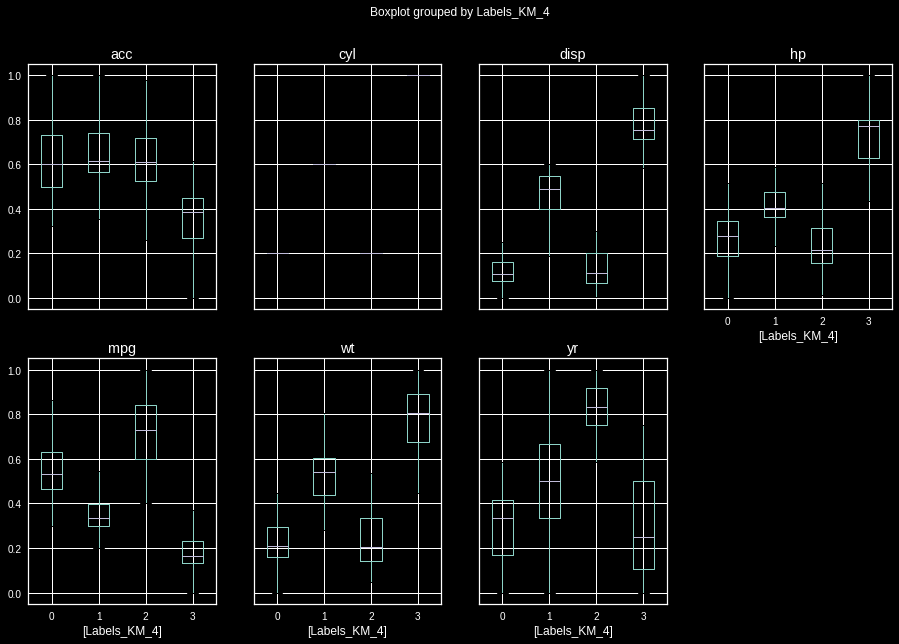

In [915]:
import matplotlib.pylab as plt
plt.style.use(['dark_background'])

data_train_z_nw.boxplot(by = 'Labels_KM_4',  layout=(2,4), figsize=(15, 10))

**AgglomerativeClustering - Cluster Number = 3**

In [0]:
##  More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
model = AgglomerativeClustering(n_clusters=3 ,affinity='euclidean',  linkage='average') 

## ## centroid distance, “ward” [minimum variance method ], “complete”[Maximum distance], “average”, “single”[Minimum distance]

In [919]:
print(data_train_z.columns)
print(data_train_z_nw.columns)

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')
Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'Labels_KM_4'], dtype='object')


In [920]:
model.fit(data_train_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [0]:
data_train_z_nw['Labels_avAG_3'] = model.labels_

In [922]:
data_train_z_nw.groupby(["Labels_avAG_3"]).count()

cyl  disp   hp   wt  acc   yr  mpg  Labels_KM_4
Labels_avAG_3                                                 
0               99    99   99   99   99   99   99           99
1               87    87   87   87   87   87   87           87
2              212   212  212  212  212  212  212          212

In [0]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [0]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [925]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_train_z, 'average')
c, coph_dists = cophenet(Z , pdist(data_train_z))

c

0.8115026618925398

In [926]:
Z.shape


(397, 4)

In [0]:
## The y-axis contains the samples and x-axis represents the distance between these samples. The horizontal line with maximum distance is the blue 
## line and hence we can decide a threshold of 6 and cut the dendrogram:

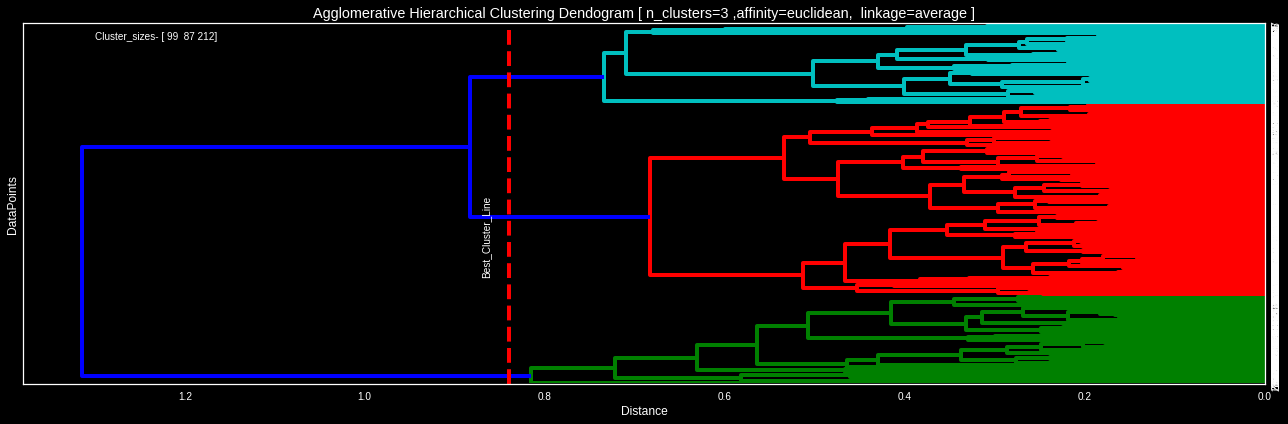

In [928]:
plt.figure(figsize=(18,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram [ n_clusters=3 ,affinity=euclidean,  linkage=average ]')
plt.xlabel('Distance')
plt.ylabel('DataPoints')
# The vertical line for average silhouette score of all the values



best_line = 0.84

ax=dendrogram(Z, leaf_rotation=90.,color_threshold=best_line,  leaf_font_size=10.,orientation='left' )

plt.axvline(x=best_line, color='r', linestyle='--')
## setting plot style 
plt.style.use(['dark_background'])
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 
  
plt.text(best_line+0.03,2000,"Best_Cluster_Line",rotation=90)
plt.text(1.3,3800,"Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_avAG_3"]).count())[:,1]),rotation=0)
plt.tight_layout()

In [0]:
model = AgglomerativeClustering(n_clusters=3 ,affinity='euclidean',  linkage='complete') ## “ward”, “complete”, “average”, “single”

In [930]:
model.fit(data_train_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [0]:
data_train_z_nw['Labels_cmAG_3'] = model.labels_

In [932]:
data_train_z_nw.groupby(["Labels_cmAG_3"]).count()

cyl  disp   hp   wt  acc   yr  mpg  Labels_KM_4  Labels_avAG_3
Labels_cmAG_3                                                                
0              220   220  220  220  220  220  220          220            220
1              108   108  108  108  108  108  108          108            108
2               70    70   70   70   70   70   70           70             70

In [933]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_train_z, 'complete')
c, coph_dists = cophenet(Z , pdist(data_train_z))

c

0.7335780584912012

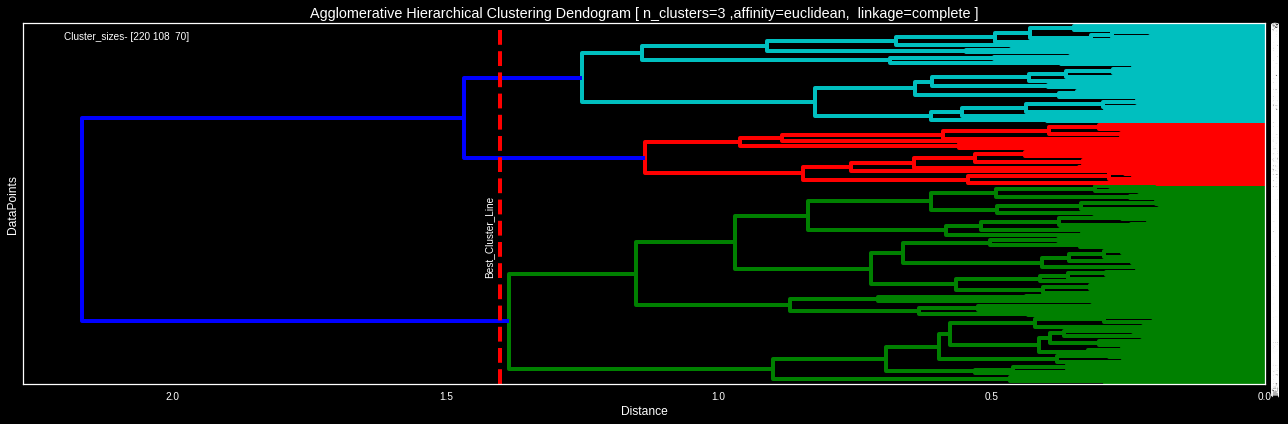

In [934]:
plt.figure(figsize=(18,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram [ n_clusters=3 ,affinity=euclidean,  linkage=complete ]')
plt.xlabel('Distance')
plt.ylabel('DataPoints')

best_line =1.4

ax=dendrogram(Z, leaf_rotation=90.,color_threshold=best_line,  leaf_font_size=10.,orientation='left' )
plt.axvline(x=best_line, color='r', linestyle='--')
plt.text(best_line+0.03,2000,"Best_Cluster_Line",rotation=90)
plt.text(2.2,3800,"Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_cmAG_3"]).count())[:,1]),rotation=0)
plt.tight_layout()

In [0]:
model = AgglomerativeClustering(n_clusters=3 ,affinity='euclidean',  linkage='ward') 

## centroid distance, “ward”, “complete”[Maximum distance], “average”, “single”[Minimum distance]

In [936]:
model.fit(data_train_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [0]:
data_train_z_nw['Labels_wdAG_3'] = model.labels_

In [938]:
data_train_z_nw.groupby(["Labels_wdAG_3"]).count()

cyl  disp   hp  ...  Labels_KM_4  Labels_avAG_3  Labels_cmAG_3
Labels_wdAG_3                  ...                                           
0              219   219  219  ...          219            219            219
1              103   103  103  ...          103            103            103
2               76    76   76  ...           76             76             76

[3 rows x 10 columns]

In [939]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_train_z, 'ward')
c, coph_dists = cophenet(Z , pdist(data_train_z))

c

0.7380227704061174

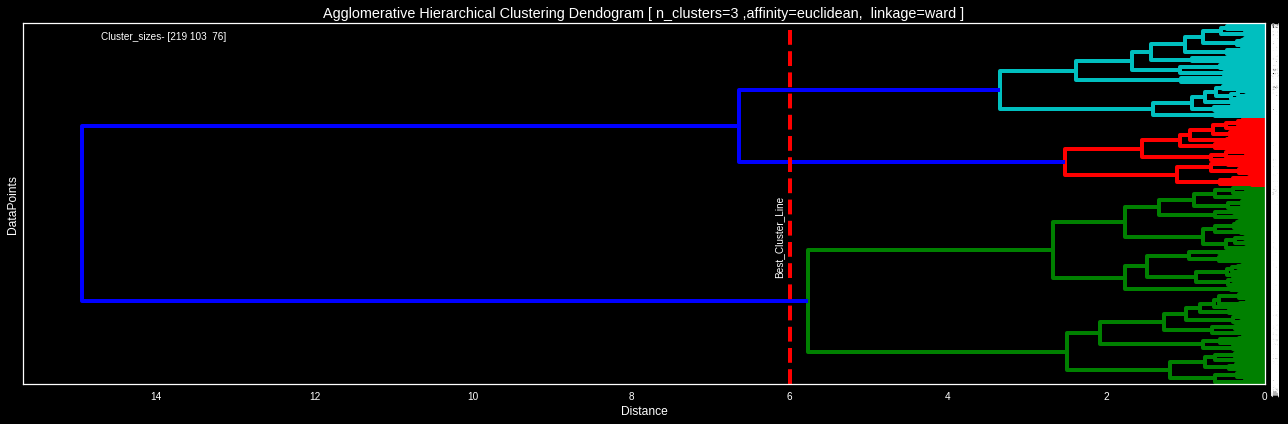

In [940]:
plt.figure(figsize=(18,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram [ n_clusters=3 ,affinity=euclidean,  linkage=ward ]')
plt.xlabel('Distance')
plt.ylabel('DataPoints')

best_line = 6
ax=dendrogram(Z, leaf_rotation=90.,color_threshold=best_line,  leaf_font_size=10.,orientation='left' )


plt.axvline(x=best_line, color='r', linestyle='--')
plt.text(best_line+0.2,2000,"Best_Cluster_Line",rotation=90)
plt.text(14.7,3800,"Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_wdAG_3"]).count())[:,1]),rotation=0)
plt.tight_layout()

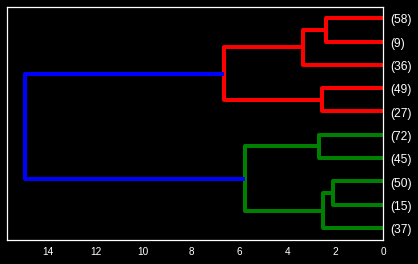

In [941]:
dendrogram(Z, truncate_mode='lastp',  p=10 , orientation ='left')
plt.style.use('seaborn-white')
# show only the last p merged clusters || 'mtica' is an alias for 'level' that’s kept for backward compatibility.
     # show only the last p merged clusters

plt.show()

In [0]:
############################################################################################################################################################################################
############################################################################################################################################################################################

**AgglomerativeClustering** = 4

In [0]:
##  More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
model = AgglomerativeClustering(n_clusters=4 ,affinity='euclidean',  linkage='average') 

## ## centroid distance, “ward” [minimum variance method ], “complete”[Maximum distance], “average”, “single”[Minimum distance]

In [946]:
print(data_train_z.columns)
print(data_train_z_nw.columns)

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')
Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'Labels_KM_4',
       'Labels_avAG_3', 'Labels_cmAG_3', 'Labels_wdAG_3'],
      dtype='object')


In [947]:
model.fit(data_train_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [0]:
data_train_z_nw['Labels_avAG_4'] = model.labels_

In [949]:
data_train_z_nw.groupby(["Labels_avAG_4"]).count()

cyl  disp   hp  ...  Labels_avAG_3  Labels_cmAG_3  Labels_wdAG_3
Labels_avAG_4                  ...                                             
0               87    87   87  ...             87             87             87
1               98    98   98  ...             98             98             98
2              212   212  212  ...            212            212            212
3                1     1    1  ...              1              1              1

[4 rows x 11 columns]

In [0]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [0]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [952]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_train_z, 'average')
c, coph_dists = cophenet(Z , pdist(data_train_z))

c

0.8115026618925398

In [953]:
Z.shape


(397, 4)

In [0]:
## The y-axis contains the samples and x-axis represents the distance between these samples. The horizontal line with maximum distance is the blue 
## line and hence we can decide a threshold of 6 and cut the dendrogram:

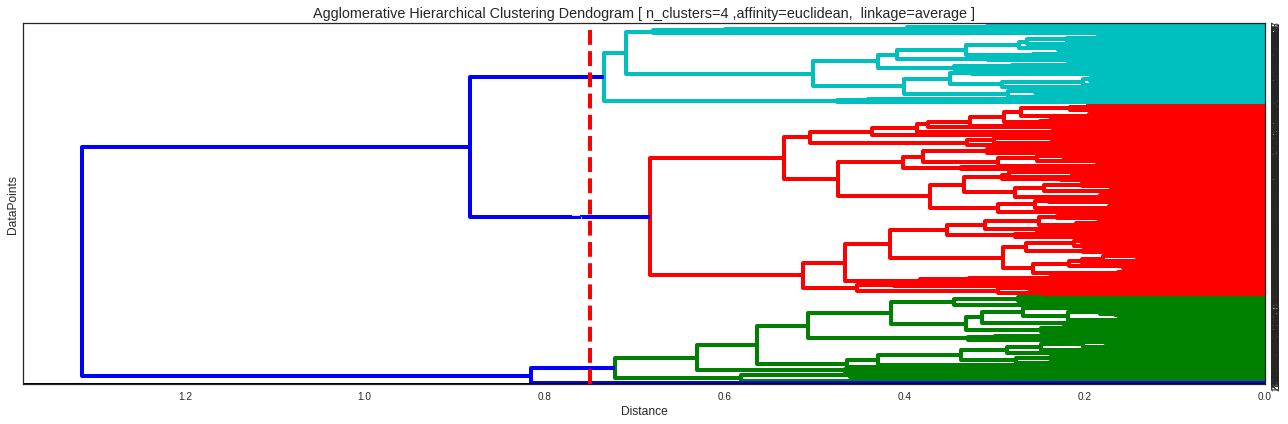

In [955]:
plt.figure(figsize=(18,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram [ n_clusters=4 ,affinity=euclidean,  linkage=average ]')
plt.xlabel('Distance')
plt.ylabel('DataPoints')
# The vertical line for average silhouette score of all the values


best_line = 0.75

ax=dendrogram(Z, leaf_rotation=90.,color_threshold=best_line,  leaf_font_size=10.,orientation='left' )

plt.axvline(x=best_line, color='r', linestyle='--')

## setting plot style 
plt.style.use(['dark_background'])
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 

plt.text(best_line+0.02,2000,"Best_Cluster_Line",rotation=90)
plt.text(1.36,3800,"Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_avAG_4"]).count())[:,1]),rotation=0)
plt.tight_layout()

In [0]:
model = AgglomerativeClustering(n_clusters=4 ,affinity='euclidean',  linkage='complete') ## “ward”, “complete”, “average”, “single”

In [957]:
model.fit(data_train_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [0]:
data_train_z_nw['Labels_cmAG_4'] = model.labels_

In [959]:
data_train_z_nw.groupby(["Labels_cmAG_4"]).count()

cyl  disp   hp  ...  Labels_cmAG_3  Labels_wdAG_3  Labels_avAG_4
Labels_cmAG_4                  ...                                             
0              108   108  108  ...            108            108            108
1              144   144  144  ...            144            144            144
2               70    70   70  ...             70             70             70
3               76    76   76  ...             76             76             76

[4 rows x 12 columns]

In [960]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_train_z, 'complete')
c, coph_dists = cophenet(Z , pdist(data_train_z))

c

0.7335780584912012

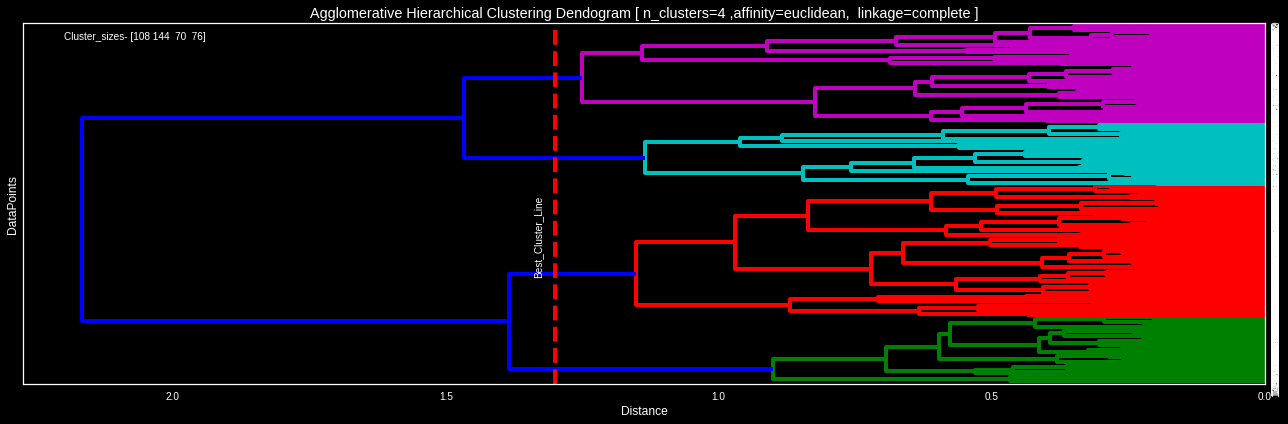

In [961]:
plt.figure(figsize=(18,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram [ n_clusters=4 ,affinity=euclidean,  linkage=complete ]')
plt.xlabel('Distance')
plt.ylabel('DataPoints')

best_line = 1.3

ax=dendrogram(Z, leaf_rotation=90.,color_threshold=best_line,  leaf_font_size=10.,orientation='left' )

plt.axvline(x=best_line, color='r', linestyle='--')
## setting plot style 
plt.style.use(['dark_background'])
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 
plt.text(best_line+0.04,2000,"Best_Cluster_Line",rotation=90)
plt.text(2.2,3800,"Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_cmAG_4"]).count())[:,1]),rotation=0)
plt.tight_layout()

In [0]:
model = AgglomerativeClustering(n_clusters=4 ,affinity='euclidean',  linkage='ward') 

## centroid distance, “ward”, “complete”[Maximum distance], “average”, “single”[Minimum distance]

In [963]:
model.fit(data_train_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [0]:
data_train_z_nw['Labels_wdAG_4'] = model.labels_

In [965]:
data_train_z_nw.groupby(["Labels_wdAG_4"]).count()

cyl  disp   hp  ...  Labels_wdAG_3  Labels_avAG_4  Labels_cmAG_4
Labels_wdAG_4                  ...                                             
0              103   103  103  ...            103            103            103
1              117   117  117  ...            117            117            117
2               76    76   76  ...             76             76             76
3              102   102  102  ...            102            102            102

[4 rows x 13 columns]

In [966]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_train_z, 'ward')
c, coph_dists = cophenet(Z , pdist(data_train_z))

c

0.7380227704061174

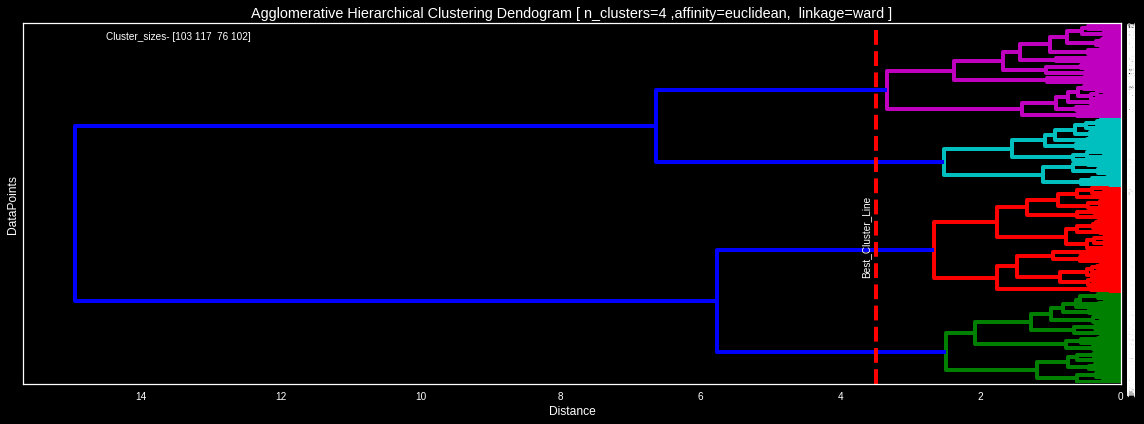

In [967]:
plt.figure(figsize=(16,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram [ n_clusters=4 ,affinity=euclidean,  linkage=ward ]')
plt.xlabel('Distance')
plt.ylabel('DataPoints')


best_line = 3.5

ax=dendrogram(Z, leaf_rotation=90.,color_threshold=best_line,  leaf_font_size=10.,orientation='left' )

plt.axvline(x=best_line, color='r', linestyle='--')
## setting plot style 
plt.style.use(['dark_background'])
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 
plt.text(best_line+0.2,2000,"Best_Cluster_Line",rotation=90)
plt.text(14.5,3800,"Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_wdAG_4"]).count())[:,1]),rotation=0)
plt.tight_layout()

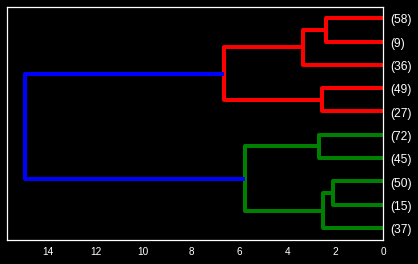

In [968]:
dendrogram(Z, truncate_mode='lastp',  p=10 , orientation ='left')
# show only the last p merged clusters || 'mtica' is an alias for 'level' that’s kept for backward compatibility.
     # show only the last p merged clusters

plt.show()

In [0]:
X = data_train_z_nw[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']]
y = data_train_z_nw['Labels_KM_4']

Projecting 7-dimensional data to 2D


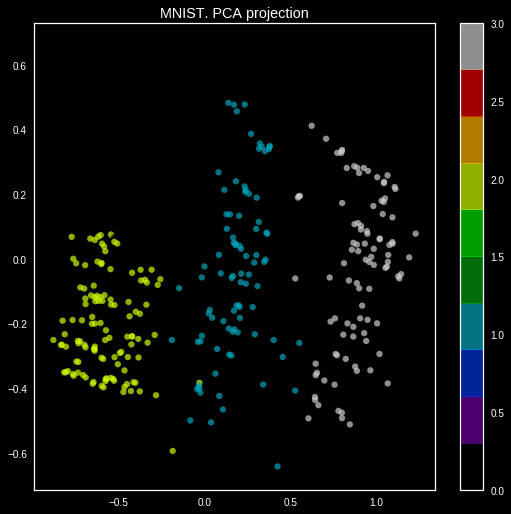

In [970]:
from sklearn import decomposition
from sklearn import datasets
plt.style.use(['dark_background'])
pca = decomposition.PCA(n_components=2)

X_reduced = pca.fit_transform(data_train_z)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(8,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

CPU times: user 1.91 s, sys: 20.4 ms, total: 1.93 s
Wall time: 1.91 s


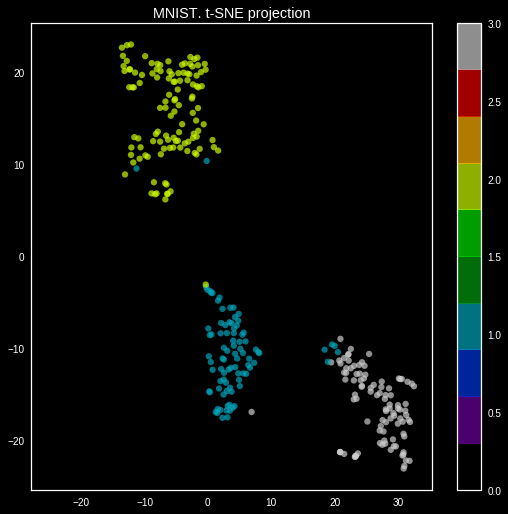

In [971]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)
plt.style.use(['dark_background'])
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

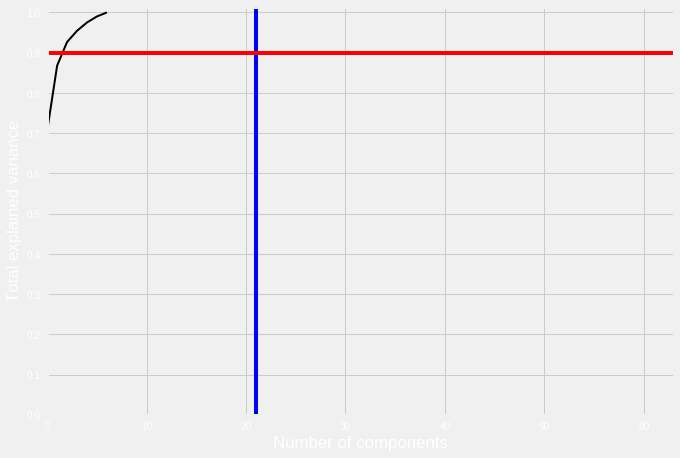

In [972]:
pca = decomposition.PCA().fit(X)
plt.style.use('fivethirtyeight') 
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [973]:
data_train_z_nw.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'Labels_KM_4',
       'Labels_avAG_3', 'Labels_cmAG_3', 'Labels_wdAG_3', 'Labels_avAG_4',
       'Labels_cmAG_4', 'Labels_wdAG_4'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa43450e550>,
      dtype=object)

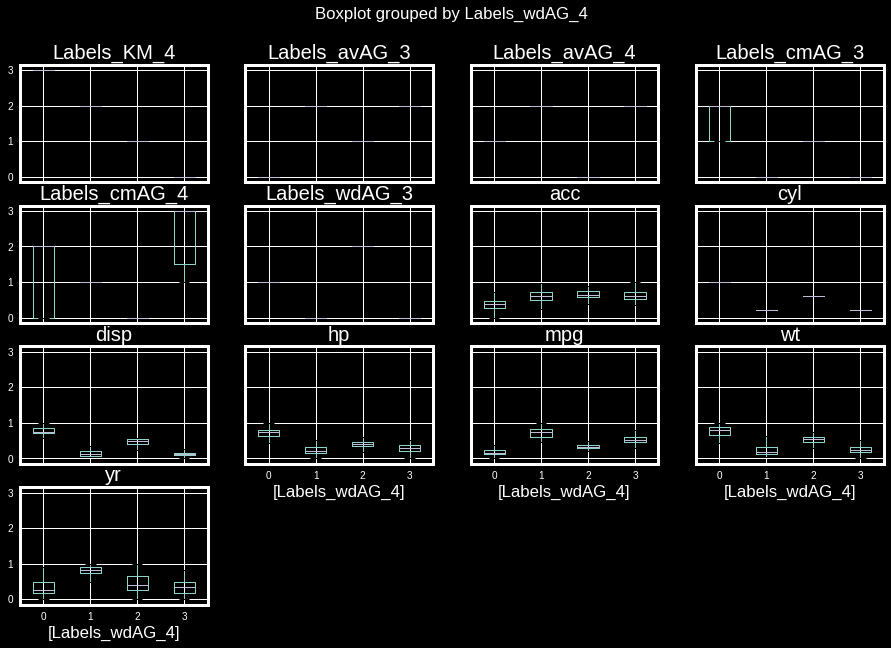

In [974]:
import matplotlib.pylab as plt
## setting plot style 
plt.style.use(['dark_background'])

data_train_z_nw.boxplot(by = 'Labels_wdAG_4',  figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4345e3e10>,
      dtype=object)

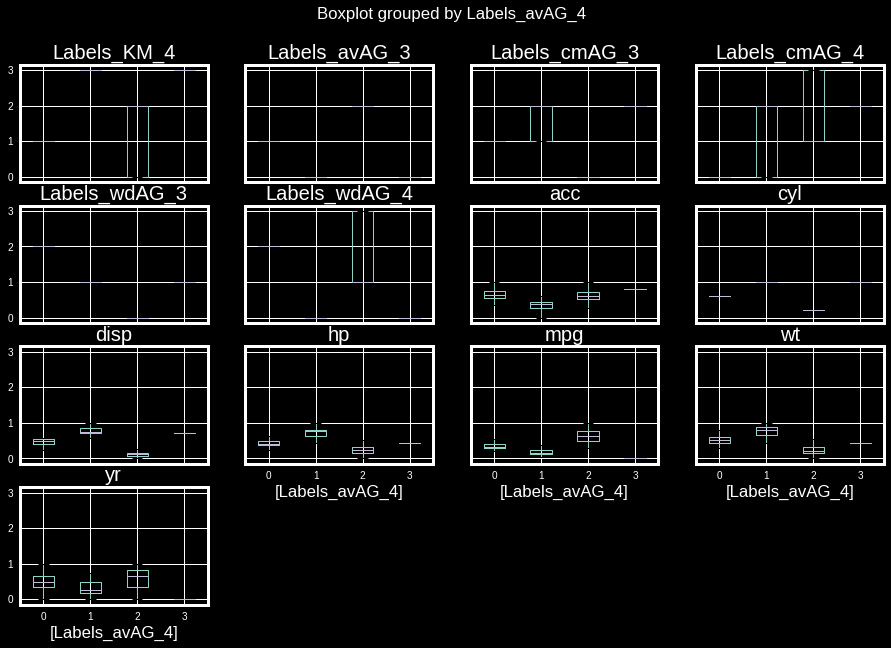

In [975]:
import matplotlib.pylab as plt

data_train_z_nw.boxplot(by = 'Labels_avAG_4',  figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa43331feb8>,
      dtype=object)

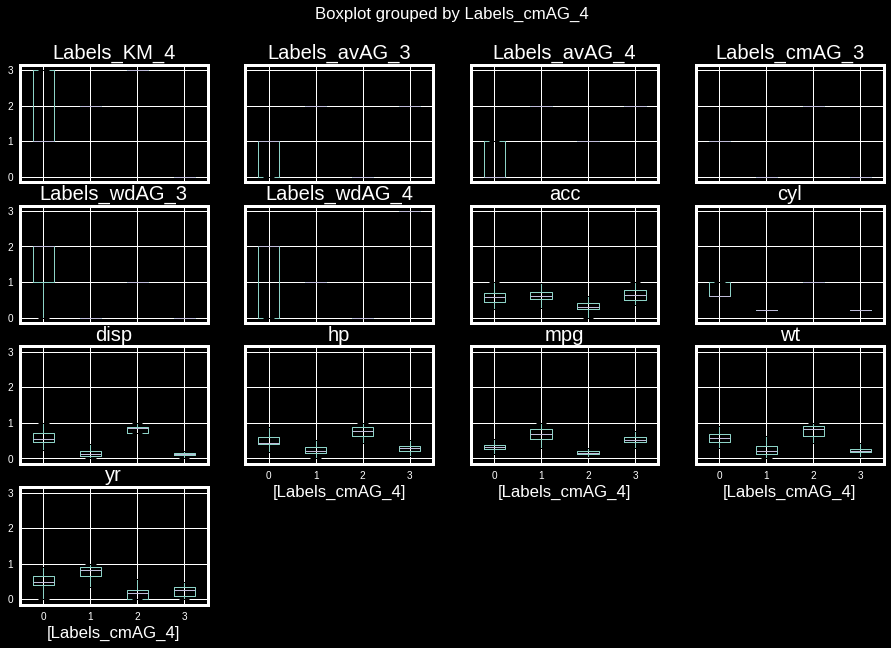

In [976]:
import matplotlib.pylab as plt

data_train_z_nw.boxplot(by = 'Labels_cmAG_4',  figsize=(15, 10))

In [977]:
data_train_z_nw.head(2)

cyl      disp        hp  ...  Labels_avAG_4  Labels_cmAG_4  Labels_wdAG_4
0  1.0  0.719880  0.626866  ...              1              2              0
1  1.0  0.849398  0.888060  ...              1              2              0

[2 rows x 14 columns]

In [0]:
################################ VISUALLY ANALYZING THE CLUSTERS  4 for KMEANS ###############################################################

Text(0.5, 0, '   hp')

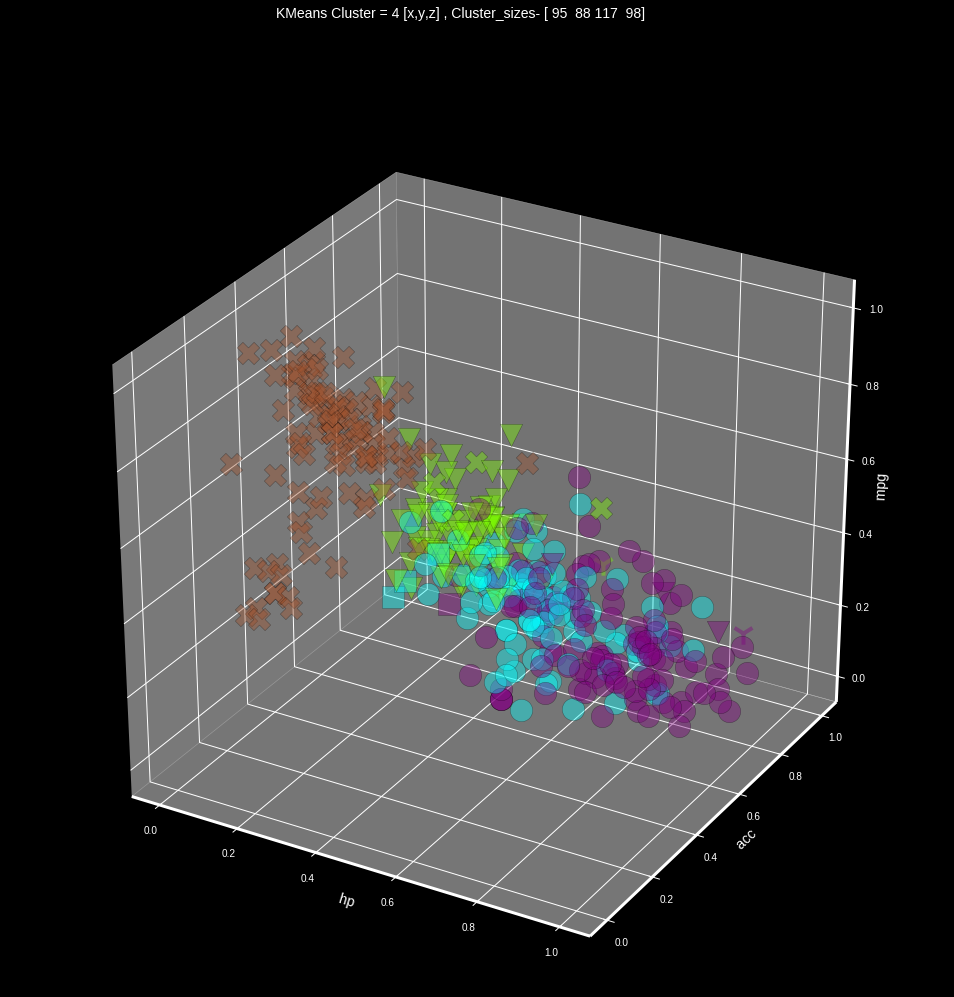

In [979]:
# Visualizing 6-D mix data using scatter plots
# To use  hue,depth, size and shape
plt.style.use(['dark_background'])
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## %matplotlib notebook

fig = plt.figure(figsize=(15,15))

t = fig.suptitle("KMeans Cluster = 4 [x,y,z] , Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_KM_4"]).count())[:,1]), fontsize=14)  
ax = fig.add_subplot(111, projection='3d')

xs = list(data_train_z_nw['mpg'])
ys = list(data_train_z_nw['acc'])
zs = list(data_train_z_nw['hp'])
data_points = [(x, y, z) for x,y,z in zip(xs, ys, zs)]

##  https://www.rapidtables.com/web/color/RGB_Color.html#color-table

ss =  list(data_train_z_nw['wt'])

colors = ['sienna' if Labels_KM == 3 else 'Purple' if Labels_KM ==2 else '#7CFC00' if Labels_KM ==1 else 'Aqua' if Labels_KM == 0 else 'Navy' for Labels_KM in list(data_train_z_nw['Labels_KM_4'])] 


## cyl = 1.0,0.2,0.6,0.0,0.4

## Different markers -

## Triangle-shaped: v, <, >, ^
## Cross-like: *, +, 1, 2, 3, 4
## Circle-like: o, ., h, p, H, 8


markers = [ 'X' if q == 1.0 else 'o' if q == 0.2  else 'v' if q == 0.6   else ',' if q == 0.0  else '1' for q in np.round((data_train_z_nw['cyl']),2)] 

for data, color , size  , mark  in zip(data_points, colors , ss , markers  ):  ##  , mark , markers, marker=mark
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size+500.0  , marker=mark  )

ax.set_zlabel('   mpg', fontsize=14)
ax.set_ylabel('   acc', fontsize=14)
ax.set_xlabel('   hp', fontsize=14)




Text(0.5, 0, '   acc')

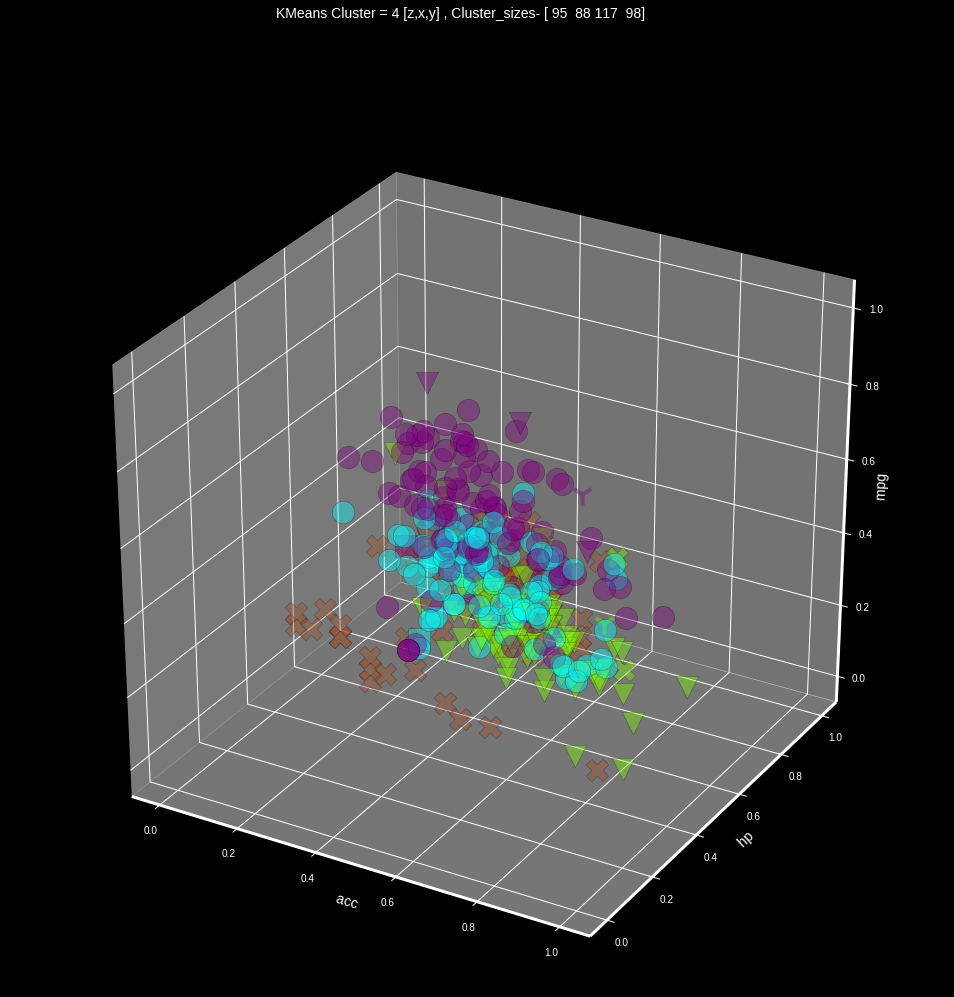

In [980]:
# Visualizing 6-D mix data using scatter plots
# To use  hue,depth, size and shape

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## %matplotlib notebook

fig = plt.figure(figsize=(15,15))
t = fig.suptitle("KMeans Cluster = 4 [z,x,y] , Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_KM_4"]).count())[:,1]), fontsize=14) 
 
ax = fig.add_subplot(111, projection='3d')

xs = list(data_train_z_nw['mpg'])
ys = list(data_train_z_nw['acc'])
zs = list(data_train_z_nw['hp'])
data_points = [(x, y, z) for z,x,y in zip(xs, ys, zs)]

##  https://www.rapidtables.com/web/color/RGB_Color.html#color-table

ss =  list(data_train_z_nw['wt'])

colors = ['sienna' if Labels_KM == 3 else 'Purple' if Labels_KM ==2 else '#7CFC00' if Labels_KM ==1 else 'Aqua' if Labels_KM == 0 else 'Navy' for Labels_KM in list(data_train_z_nw['Labels_KM_4'])] 


## cyl = 1.0,0.2,0.6,0.0,0.4

## Different markers -

## Triangle-shaped: v, <, >, ^
## Cross-like: *, +, 1, 2, 3, 4
## Circle-like: o, ., h, p, H, 8


markers = [ 'X' if q == 1.0 else 'o' if q == 0.2  else 'v' if q == 0.6   else ',' if q == 0.0  else '1' for q in np.round((data_train_z_nw['cyl']),2)] 

for data, color , size  , mark  in zip(data_points, colors , ss , markers  ):  ##  , mark , markers, marker=mark
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size+500.0  , marker=mark  )

ax.set_zlabel('   mpg', fontsize=14)
ax.set_ylabel('   hp', fontsize=14)
ax.set_xlabel('   acc', fontsize=14)




Text(0.5, 0, '   hp')

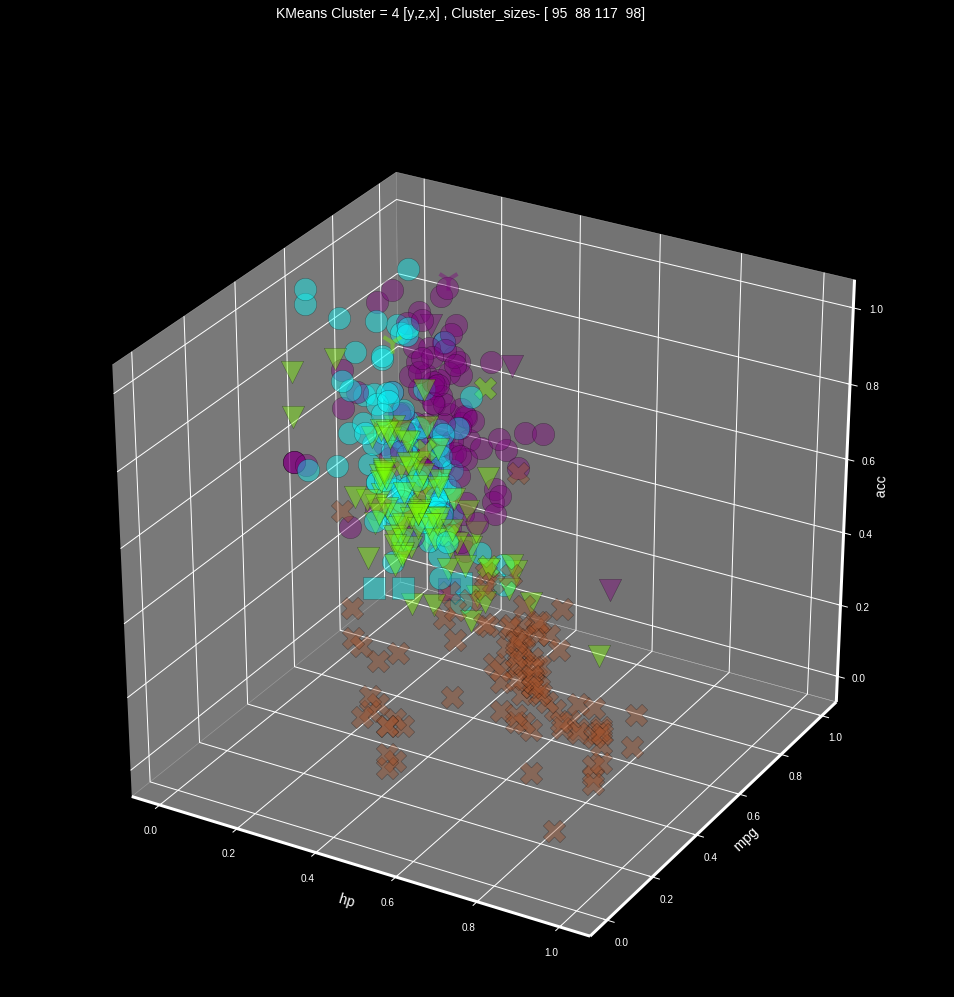

In [981]:
# Visualizing 6-D mix data using scatter plots
# To use  hue,depth, size and shape

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## %matplotlib notebook

fig = plt.figure(figsize=(15,15))
t = fig.suptitle("KMeans Cluster = 4 [y,z,x] , Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_KM_4"]).count())[:,1]), fontsize=14) 

ax = fig.add_subplot(111, projection='3d')

xs = list(data_train_z_nw['mpg'])
ys = list(data_train_z_nw['acc'])
zs = list(data_train_z_nw['hp'])
data_points = [(x, y, z) for y,z,x in zip(xs, ys, zs)]

##  https://www.rapidtables.com/web/color/RGB_Color.html#color-table

ss =  list(data_train_z_nw['wt'])

colors = ['sienna' if Labels_KM == 3 else 'Purple' if Labels_KM ==2 else '#7CFC00' if Labels_KM ==1 else 'Aqua' if Labels_KM == 0 else 'Navy' for Labels_KM in list(data_train_z_nw['Labels_KM_4'])] 


## cyl = 1.0,0.2,0.6,0.0,0.4

## Different markers -

## Triangle-shaped: v, <, >, ^
## Cross-like: *, +, 1, 2, 3, 4
## Circle-like: o, ., h, p, H, 8


markers = [ 'X' if q == 1.0 else 'o' if q == 0.2  else 'v' if q == 0.6   else ',' if q == 0.0  else '1' for q in np.round((data_train_z_nw['cyl']),2)] 

for data, color , size  , mark  in zip(data_points, colors , ss , markers  ):  ##  , mark , markers, marker=mark
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size+500.0  , marker=mark  )

ax.set_ylabel('   mpg', fontsize=14)
ax.set_zlabel('   acc', fontsize=14)
ax.set_xlabel('   hp', fontsize=14)




In [0]:

################################ VISUALLY ANALYZING THE CLUSTERS  4 for Agglomerative Clustering ###############################################################

In [983]:
data_train_z_nw.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'Labels_KM_4',
       'Labels_avAG_3', 'Labels_cmAG_3', 'Labels_wdAG_3', 'Labels_avAG_4',
       'Labels_cmAG_4', 'Labels_wdAG_4'],
      dtype='object')

Text(0.5, 0, '   hp')

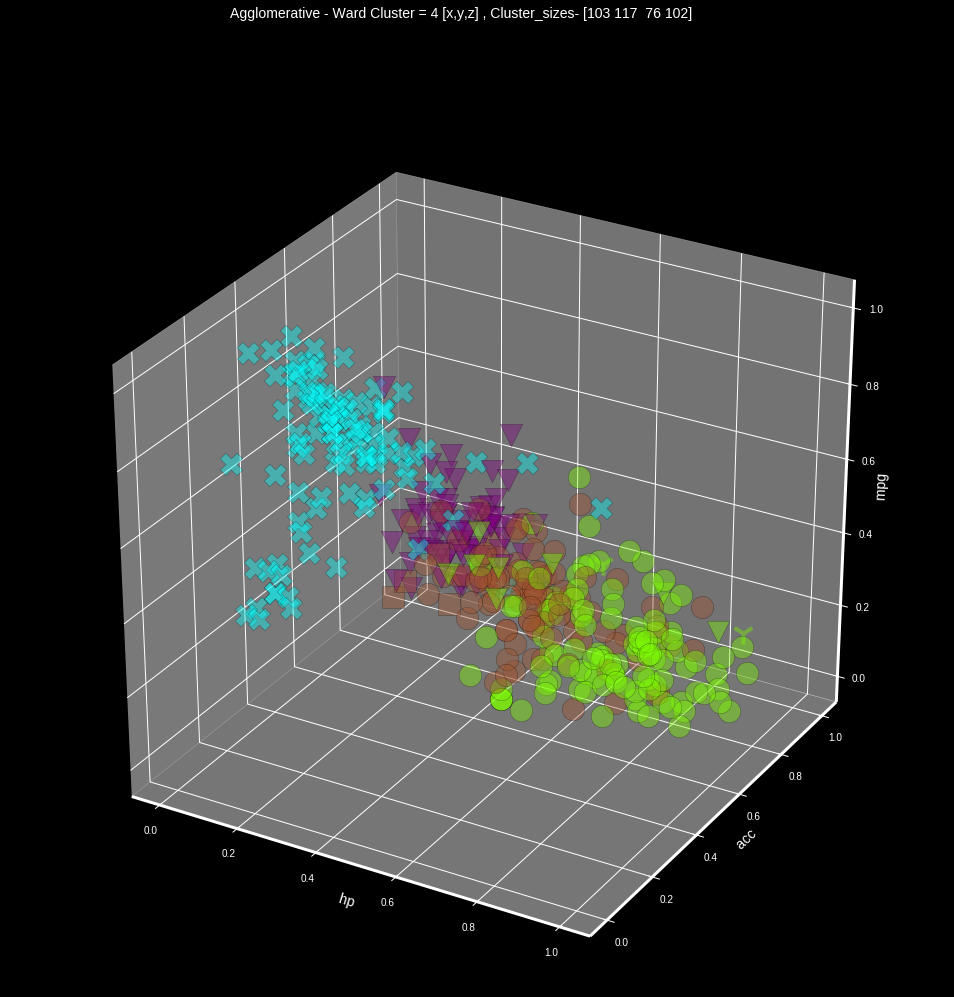

In [984]:
# Visualizing 6-D mix data using scatter plots
# To use  hue,depth, size and shape

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## %matplotlib notebook

fig = plt.figure(figsize=(15,15))
t = fig.suptitle("Agglomerative - Ward Cluster = 4 [x,y,z] , Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_wdAG_4"]).count())[:,1]), fontsize=14) 
  
ax = fig.add_subplot(111, projection='3d')

xs = list(data_train_z_nw['mpg'])
ys = list(data_train_z_nw['acc'])
zs = list(data_train_z_nw['hp'])
data_points = [(x, y, z) for x,y,z in zip(xs, ys, zs)]

##  https://www.rapidtables.com/web/color/RGB_Color.html#color-table

ss =  list(data_train_z_nw['wt'])

colors = ['sienna' if Labels_KM == 3 else 'Purple' if Labels_KM ==2 else '#7CFC00' if Labels_KM ==1 else 'Aqua' if Labels_KM == 0 else 'Navy' for Labels_KM in list(data_train_z_nw['Labels_wdAG_4'])] 


## cyl = 1.0,0.2,0.6,0.0,0.4

## Different markers -

## Triangle-shaped: v, <, >, ^
## Cross-like: *, +, 1, 2, 3, 4
## Circle-like: o, ., h, p, H, 8


markers = [ 'X' if q == 1.0 else 'o' if q == 0.2  else 'v' if q == 0.6   else ',' if q == 0.0  else '1' for q in np.round((data_train_z_nw['cyl']),2)] 

for data, color , size  , mark  in zip(data_points, colors , ss , markers  ):  ##  , mark , markers, marker=mark
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size+500.0  , marker=mark  )

ax.set_zlabel('   mpg', fontsize=14)
ax.set_ylabel('   acc', fontsize=14)
ax.set_xlabel('   hp', fontsize=14)




Text(0.5, 0, '   acc')

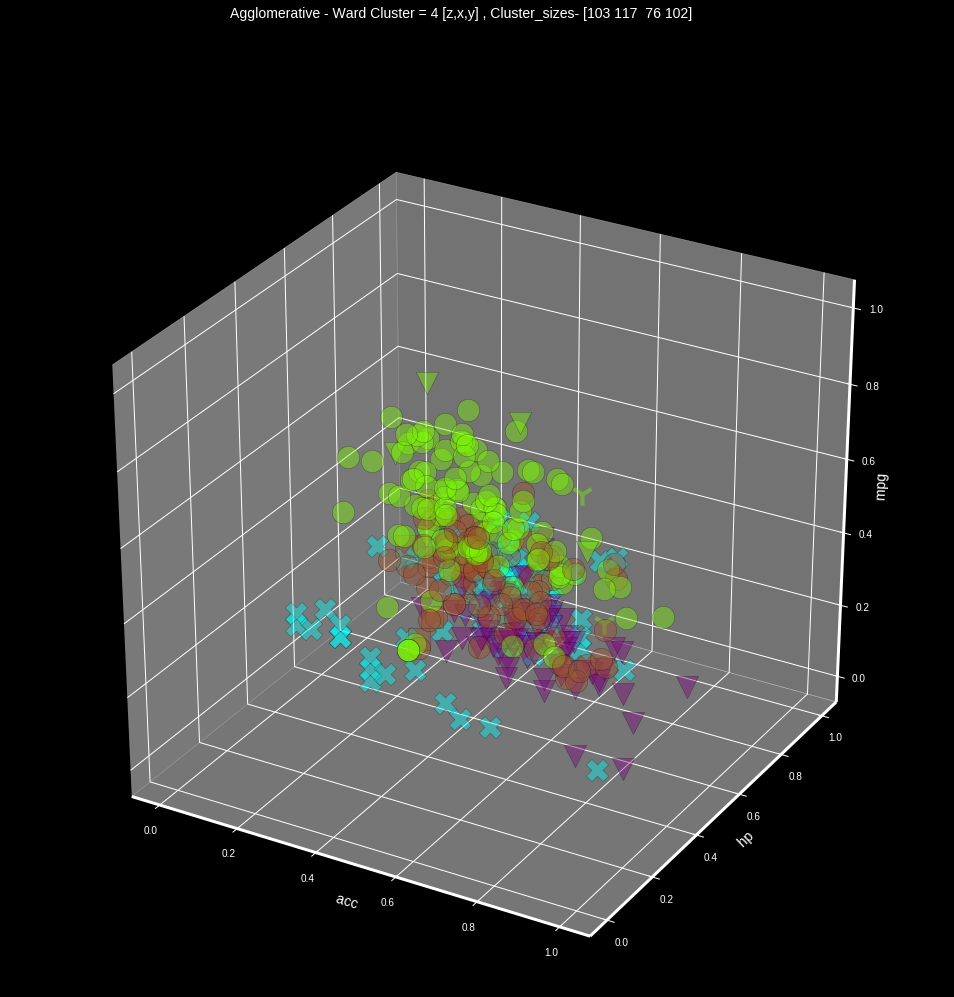

In [985]:
# Visualizing 6-D mix data using scatter plots
# To use  hue,depth, size and shape

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## %matplotlib notebook

fig = plt.figure(figsize=(15,15))
t = fig.suptitle("Agglomerative - Ward Cluster = 4 [z,x,y] , Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_wdAG_4"]).count())[:,1]), fontsize=14) 

ax = fig.add_subplot(111, projection='3d')

xs = list(data_train_z_nw['mpg'])
ys = list(data_train_z_nw['acc'])
zs = list(data_train_z_nw['hp'])
data_points = [(x, y, z) for z,x,y in zip(xs, ys, zs)]

##  https://www.rapidtables.com/web/color/RGB_Color.html#color-table

ss =  list(data_train_z_nw['wt'])
colors = ['sienna' if Labels_KM == 3 else 'Purple' if Labels_KM ==2 else '#7CFC00' if Labels_KM ==1 else 'Aqua' if Labels_KM == 0 else 'Navy' for Labels_KM in list(data_train_z_nw['Labels_wdAG_4'])] 


## cyl = 1.0,0.2,0.6,0.0,0.4

## Different markers -

## Triangle-shaped: v, <, >, ^
## Cross-like: *, +, 1, 2, 3, 4
## Circle-like: o, ., h, p, H, 8


markers = [ 'X' if q == 1.0 else 'o' if q == 0.2  else 'v' if q == 0.6   else ',' if q == 0.0  else '1' for q in np.round((data_train_z_nw['cyl']),2)] 

for data, color , size  , mark  in zip(data_points, colors , ss , markers  ):  ##  , mark , markers, marker=mark
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size+500.0  , marker=mark  )

ax.set_zlabel('   mpg', fontsize=14)
ax.set_ylabel('   hp', fontsize=14)
ax.set_xlabel('   acc', fontsize=14)




Text(0.5, 0, '   hp')

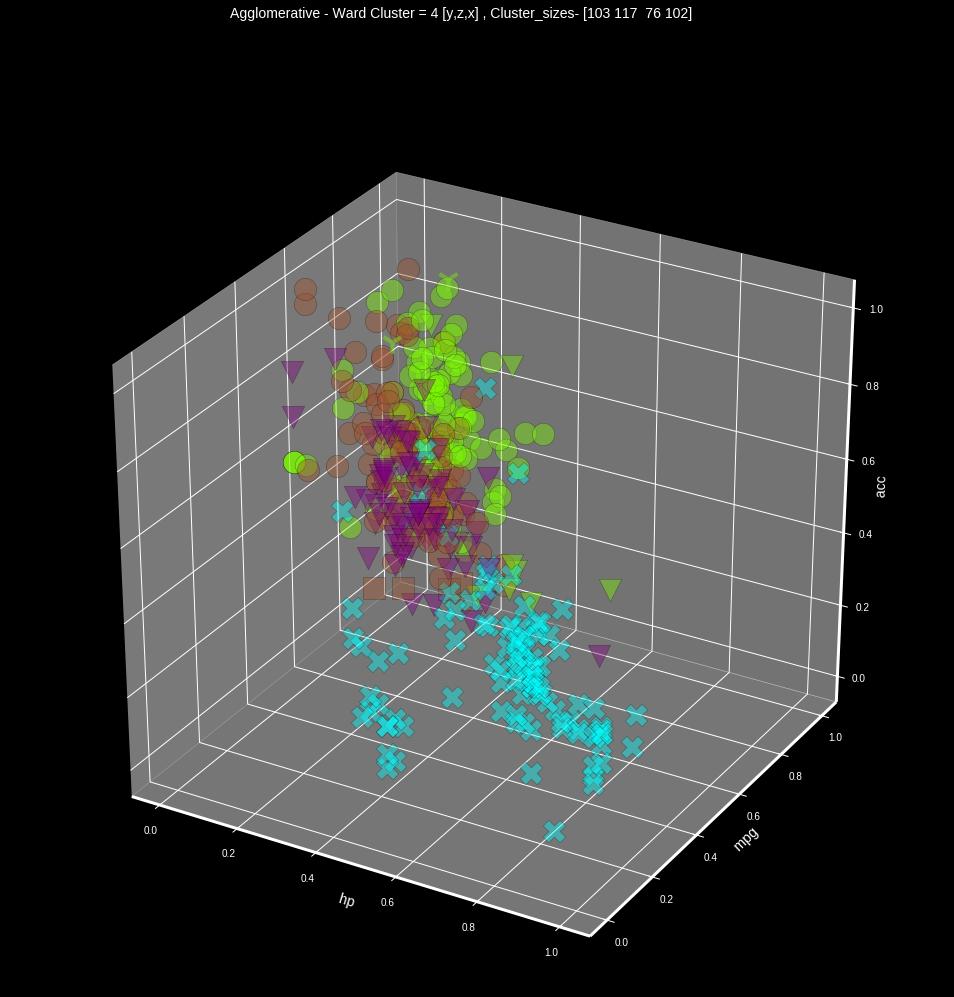

In [986]:
# Visualizing 6-D mix data using scatter plots
# To use  hue,depth, size and shape

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## %matplotlib notebook

fig = plt.figure(figsize=(15,15))
t = fig.suptitle("Agglomerative - Ward Cluster = 4 [y,z,x] , Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_wdAG_4"]).count())[:,1]), fontsize=14)


ax = fig.add_subplot(111, projection='3d')

xs = list(data_train_z_nw['mpg'])
ys = list(data_train_z_nw['acc'])
zs = list(data_train_z_nw['hp'])
data_points = [(x, y, z) for y,z,x in zip(xs, ys, zs)]

##  https://www.rapidtables.com/web/color/RGB_Color.html#color-table

ss =  list(data_train_z_nw['wt'])

colors = ['sienna' if Labels_KM == 3 else 'Purple' if Labels_KM ==2 else '#7CFC00' if Labels_KM ==1 else 'Aqua' if Labels_KM == 0 else 'Navy' for Labels_KM in list(data_train_z_nw['Labels_wdAG_4'])] 


## cyl = 1.0,0.2,0.6,0.0,0.4

## Different markers -

## Triangle-shaped: v, <, >, ^
## Cross-like: *, +, 1, 2, 3, 4
## Circle-like: o, ., h, p, H, 8


markers = [ 'X' if q == 1.0 else 'o' if q == 0.2  else 'v' if q == 0.6   else ',' if q == 0.0  else '1' for q in np.round((data_train_z_nw['cyl']),2)] 

for data, color , size  , mark  in zip(data_points, colors , ss , markers  ):  ##  , mark , markers, marker=mark
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size+500.0  , marker=mark  )

ax.set_ylabel('   mpg', fontsize=14)
ax.set_zlabel('   acc', fontsize=14)
ax.set_xlabel('   hp', fontsize=14)




In [0]:
################################ VISUALLY ANALYZING THE CLUSTERS  3 for Agglomerative Clustering ###############################################################

In [988]:
data_train_z_nw.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'Labels_KM_4',
       'Labels_avAG_3', 'Labels_cmAG_3', 'Labels_wdAG_3', 'Labels_avAG_4',
       'Labels_cmAG_4', 'Labels_wdAG_4'],
      dtype='object')

Text(0.5, 0, '   hp')

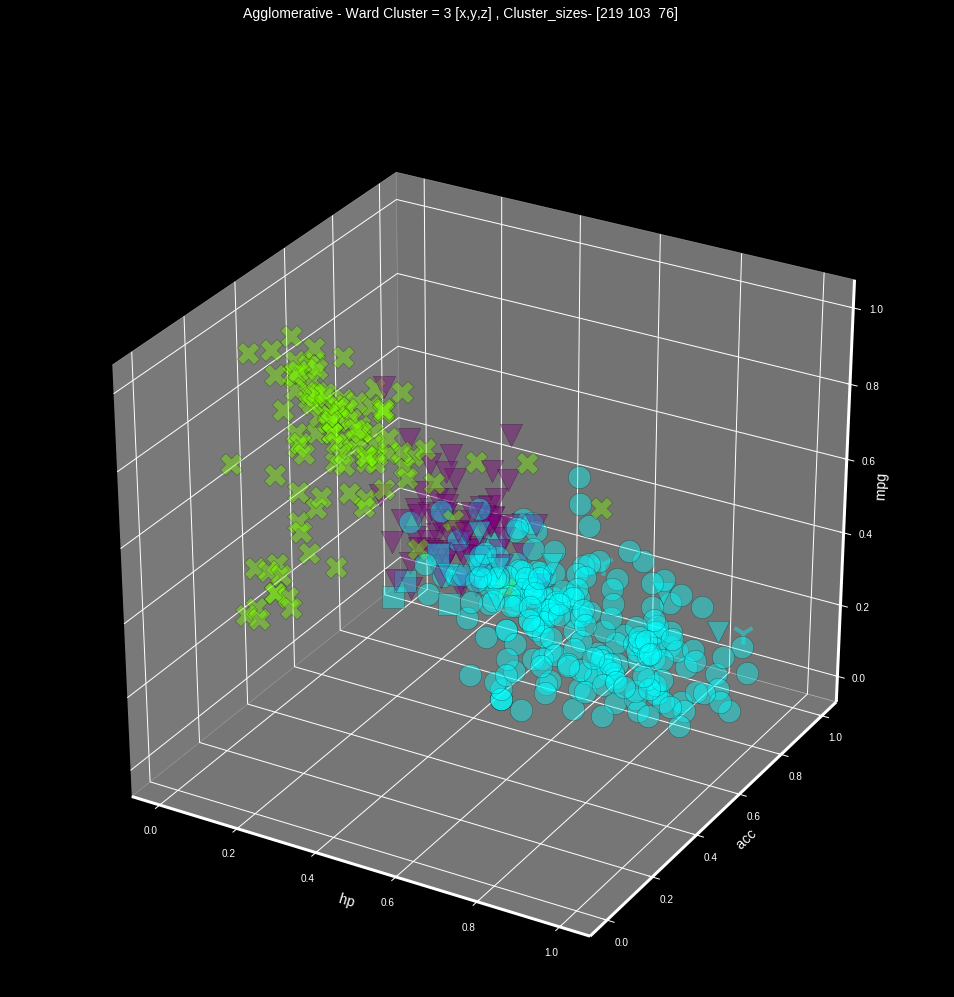

In [989]:
# Visualizing 6-D mix data using scatter plots
# To use  hue,depth, size and shape

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## %matplotlib notebook

fig = plt.figure(figsize=(15,15))

t = fig.suptitle("Agglomerative - Ward Cluster = 3 [x,y,z] , Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_wdAG_3"]).count())[:,1]), fontsize=14)

ax = fig.add_subplot(111, projection='3d')

xs = list(data_train_z_nw['mpg'])
ys = list(data_train_z_nw['acc'])
zs = list(data_train_z_nw['hp'])
data_points = [(x, y, z) for x,y,z in zip(xs, ys, zs)]

##  https://www.rapidtables.com/web/color/RGB_Color.html#color-table

ss =  list(data_train_z_nw['wt'])

colors = [ 'Purple' if Labels_KM ==2 else '#7CFC00' if Labels_KM ==1 else 'Aqua' if Labels_KM == 0 else 'Navy' for Labels_KM in list(data_train_z_nw['Labels_wdAG_3'])] 


## cyl = 1.0,0.2,0.6,0.0,0.4

## Different markers -

## Triangle-shaped: v, <, >, ^
## Cross-like: *, +, 1, 2, 3, 4
## Circle-like: o, ., h, p, H, 8


markers = [ 'X' if q == 1.0 else 'o' if q == 0.2  else 'v' if q == 0.6   else ',' if q == 0.0  else '1' for q in np.round((data_train_z_nw['cyl']),2)] 

for data, color , size  , mark  in zip(data_points, colors , ss , markers  ):  ##  , mark , markers, marker=mark
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size+500.0  , marker=mark  )

ax.set_zlabel('   mpg', fontsize=14)
ax.set_ylabel('   acc', fontsize=14)
ax.set_xlabel('   hp', fontsize=14)




Text(0.5, 0, '   hp')

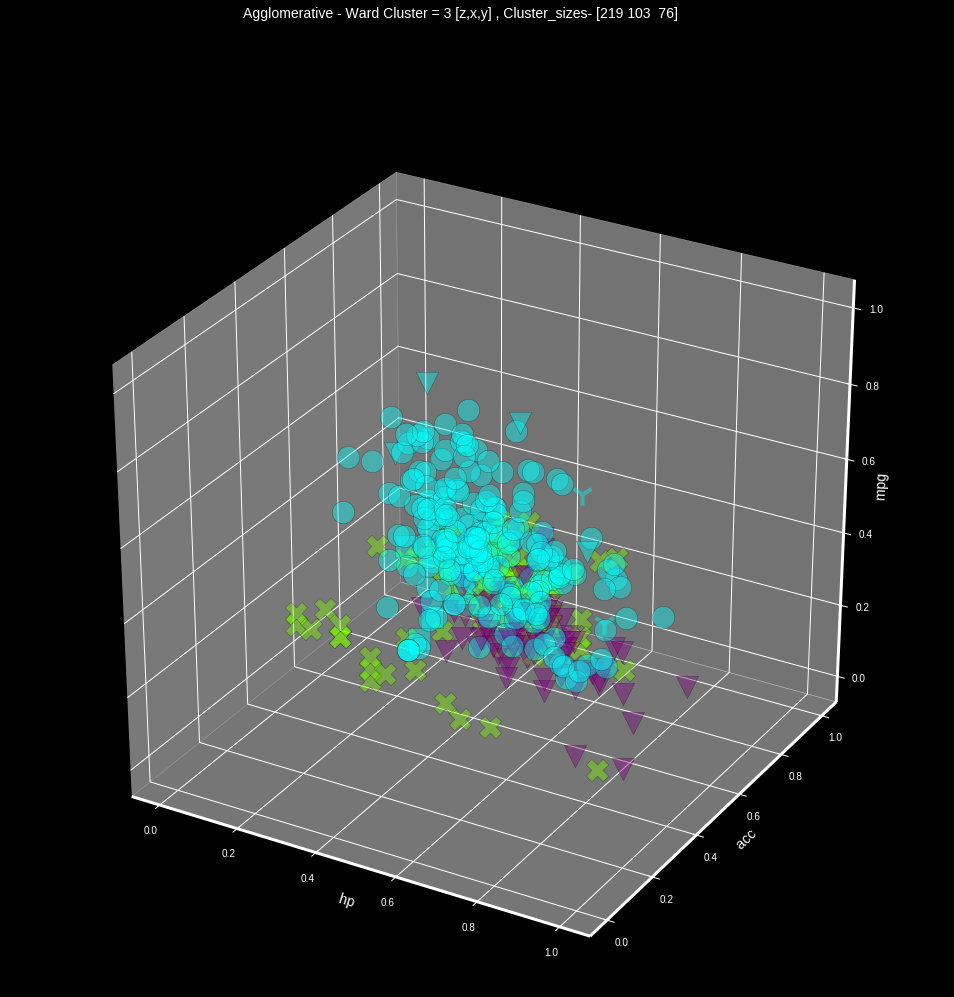

In [990]:
# Visualizing 6-D mix data using scatter plots
# To use  hue,depth, size and shape

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## %matplotlib notebook

fig = plt.figure(figsize=(15,15))
t = fig.suptitle("Agglomerative - Ward Cluster = 3 [z,x,y] , Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_wdAG_3"]).count())[:,1]), fontsize=14)


ax = fig.add_subplot(111, projection='3d')

xs = list(data_train_z_nw['mpg'])
ys = list(data_train_z_nw['acc'])
zs = list(data_train_z_nw['hp'])
data_points = [(x, y, z) for z,x,y in zip(xs, ys, zs)]

##  https://www.rapidtables.com/web/color/RGB_Color.html#color-table

ss =  list(data_train_z_nw['wt'])

colors = [ 'Purple' if Labels_KM ==2 else '#7CFC00' if Labels_KM ==1 else 'Aqua' if Labels_KM == 0 else 'Navy' for Labels_KM in list(data_train_z_nw['Labels_wdAG_3'])] 


## cyl = 1.0,0.2,0.6,0.0,0.4

## Different markers -

## Triangle-shaped: v, <, >, ^
## Cross-like: *, +, 1, 2, 3, 4
## Circle-like: o, ., h, p, H, 8


markers = [ 'X' if q == 1.0 else 'o' if q == 0.2  else 'v' if q == 0.6   else ',' if q == 0.0  else '1' for q in np.round((data_train_z_nw['cyl']),2)] 

for data, color , size  , mark  in zip(data_points, colors , ss , markers  ):  ##  , mark , markers, marker=mark
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size+500.0  , marker=mark  )

ax.set_zlabel('   mpg', fontsize=14)
ax.set_ylabel('   acc', fontsize=14)
ax.set_xlabel('   hp', fontsize=14)




Text(0.5, 0, '   hp')

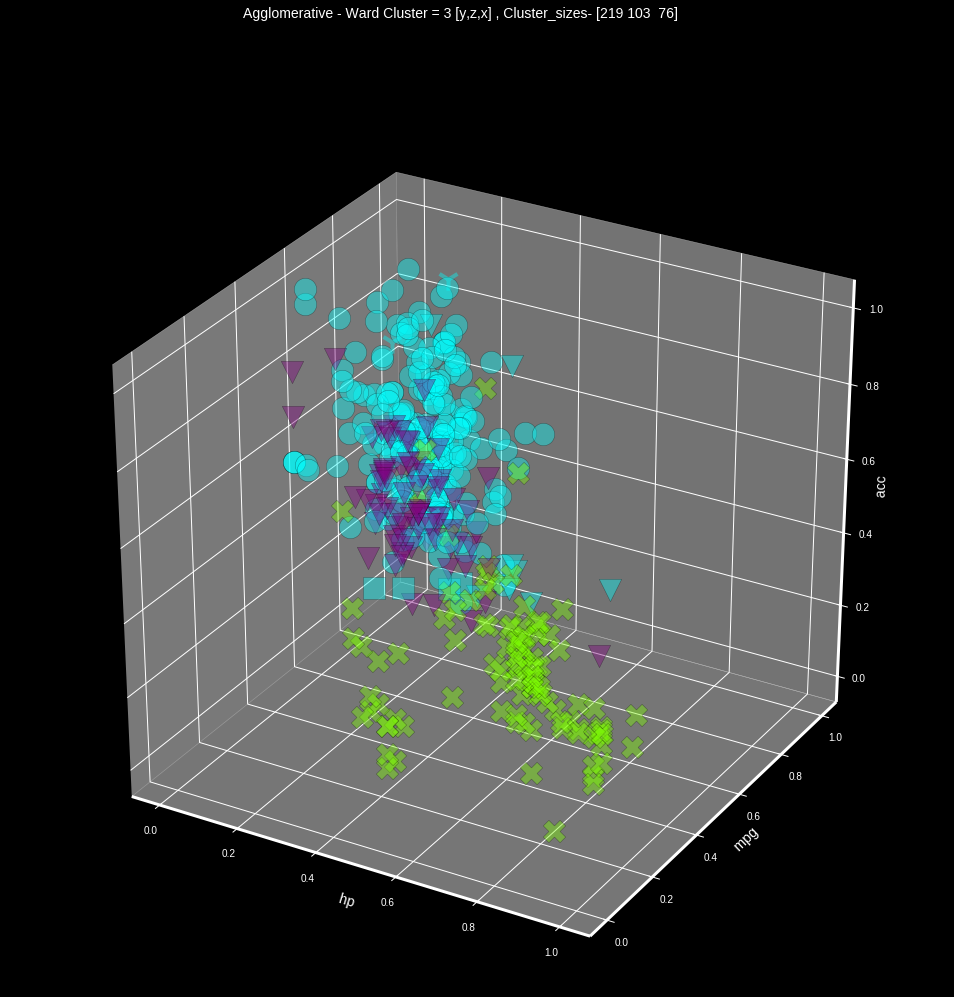

In [991]:
# Visualizing 6-D mix data using scatter plots
# To use  hue,depth, size and shape

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## %matplotlib notebook

fig = plt.figure(figsize=(15,15))
t = fig.suptitle("Agglomerative - Ward Cluster = 3 [y,z,x] , Cluster_sizes- {}".format(np.array(data_train_z_nw.groupby(["Labels_wdAG_3"]).count())[:,1]), fontsize=14)
  
ax = fig.add_subplot(111, projection='3d')

xs = list(data_train_z_nw['mpg'])
ys = list(data_train_z_nw['acc'])
zs = list(data_train_z_nw['hp'])
data_points = [(x, y, z) for y,z,x in zip(xs, ys, zs)]

##  https://www.rapidtables.com/web/color/RGB_Color.html#color-table

ss =  list(data_train_z_nw['wt'])

colors = ['sienna' if Labels_KM == 3 else 'Purple' if Labels_KM ==2 else '#7CFC00' if Labels_KM ==1 else 'Aqua' if Labels_KM == 0 else 'Navy' for Labels_KM in list(data_train_z_nw['Labels_wdAG_3'])] 


## cyl = 1.0,0.2,0.6,0.0,0.4

## Different markers -

## Triangle-shaped: v, <, >, ^
## Cross-like: *, +, 1, 2, 3, 4
## Circle-like: o, ., h, p, H, 8


markers = [ 'X' if q == 1.0 else 'o' if q == 0.2  else 'v' if q == 0.6   else ',' if q == 0.0  else '1' for q in np.round((data_train_z_nw['cyl']),2)] 

for data, color , size  , mark  in zip(data_points, colors , ss , markers  ):  ##  , mark , markers, marker=mark
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size+500.0  , marker=mark  )

ax.set_ylabel('   mpg', fontsize=14)
ax.set_zlabel('   acc', fontsize=14)
ax.set_xlabel('   hp', fontsize=14)




In [0]:
############################################################# Comparising the cluster sizes for KMeans and agglomerative ######################################

In [993]:
data_train_z_nw.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'Labels_KM_4',
       'Labels_avAG_3', 'Labels_cmAG_3', 'Labels_wdAG_3', 'Labels_avAG_4',
       'Labels_cmAG_4', 'Labels_wdAG_4'],
      dtype='object')

In [994]:
columns_4 = ['Labels_KM_4', 'Labels_avAG_4','Labels_cmAG_4', 'Labels_wdAG_4']
Cluster_size_Table_4 = Pd.DataFrame(columns=['Labels_KM_4'])
for i in range(len(columns_4)):
  Cluster_size_Table_4[columns_4[i]] = np.array(data_train_z_nw.groupby([columns_4[i]]).count())[:,1]

columns_3 = ['Labels_avAG_3', 'Labels_cmAG_3', 'Labels_wdAG_3']
Cluster_size_Table_3 = Pd.DataFrame(columns=['Labels_avAG_3'])
for i in range(len(columns_3)):
  Cluster_size_Table_3[columns_3[i]] = np.array(data_train_z_nw.groupby([columns_3[i]]).count())[:,1]
  
Cluster_size_Table = Pd.concat([Cluster_size_Table_4,Cluster_size_Table_3],axis=1)


Cluster_size_Table

Labels_KM_4  Labels_avAG_4  ...  Labels_cmAG_3  Labels_wdAG_3
0           95             87  ...          220.0          219.0
1           88             98  ...          108.0          103.0
2          117            212  ...           70.0           76.0
3           98              1  ...            NaN            NaN

[4 rows x 7 columns]

In [0]:
Cluster_size_Table.fillna('',inplace=True)

In [996]:
Cluster_size_Table

Labels_KM_4  Labels_avAG_4  ...  Labels_cmAG_3  Labels_wdAG_3
0           95             87  ...            220            219
1           88             98  ...            108            103
2          117            212  ...             70             76
3           98              1  ...                              

[4 rows x 7 columns]

In [0]:
############  With the above table we can say that the Labels_KM_4 and Labels_wdAG_4 have balanced clusters ###############################

############################### So Cluster size 4 is best cluster withKMeans and Agglomerative - Ward clusters #########################################

In [0]:
############################################### SEPARATING THE CLUSTERS INTO DIFFERENT DATASET AND APPLYING THE REGRESSION MODEL [ Cluster size = 4, KMeans Method ] ####################

In [999]:
data_train_z_nw.head()

cyl      disp        hp  ...  Labels_avAG_4  Labels_cmAG_4  Labels_wdAG_4
0  1.0  0.719880  0.626866  ...              1              2              0
1  1.0  0.849398  0.888060  ...              1              2              0
2  1.0  0.753012  0.776119  ...              1              2              0
3  1.0  0.710843  0.776119  ...              1              2              0
4  1.0  0.704819  0.701493  ...              1              2              0

[5 rows x 14 columns]

In [0]:

####################  Identifying and separating the clusters ##########################################################

In [0]:
def group(data,label_col_nm,cluster_label):
  nm1 = data[(data[label_col_nm]==cluster_label)==True]
  return nm1



In [0]:
################################## Creating different datasets for KMeans and Agglomerative Ward ######################################

In [0]:
################################################  KMEAN CLUSTER DATASET - 4 ################################

In [0]:
df_KM_4_0 = group(data_train_z_nw,'Labels_KM_4',0)
df_KM_4_1 = group(data_train_z_nw,'Labels_KM_4',1)
df_KM_4_2 = group(data_train_z_nw,'Labels_KM_4',2)
df_KM_4_3 = group(data_train_z_nw,'Labels_KM_4',3)

In [1005]:
print("df_KM_4_0 size =",df_KM_4_0.shape)
print("df_KM_4_1 size =",df_KM_4_1.shape)
print("df_KM_4_2 size =",df_KM_4_2.shape)
print("df_KM_4_3 size =",df_KM_4_3.shape)

df_KM_4_0 size = (95, 14)
df_KM_4_1 size = (88, 14)
df_KM_4_2 size = (117, 14)
df_KM_4_3 size = (98, 14)


In [0]:
################################################  AGGLOMERATIVE CLUSTER DATASET - 4  - WARD ################################

In [0]:
df_wdAG_4_0 = group(data_train_z_nw,'Labels_wdAG_4',0)
df_wdAG_4_1 = group(data_train_z_nw,'Labels_wdAG_4',1)
df_wdAG_4_2 = group(data_train_z_nw,'Labels_wdAG_4',2)
df_wdAG_4_3 = group(data_train_z_nw,'Labels_wdAG_4',3)

In [1008]:
print("df_wdAG_4_0 size =",df_wdAG_4_0.shape)
print("df_wdAG_4_1 size =",df_wdAG_4_1.shape)
print("df_wdAG_4_2 size =",df_wdAG_4_2.shape)
print("df_wdAG_4_3 size =",df_wdAG_4_3.shape)

df_wdAG_4_0 size = (103, 14)
df_wdAG_4_1 size = (117, 14)
df_wdAG_4_2 size = (76, 14)
df_wdAG_4_3 size = (102, 14)


In [0]:
#############################  REGRESSION MODEL ON  DATASETS CLUSTER WISE ################################################

In [0]:
from sklearn import  linear_model, metrics 
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,r2_score,explained_variance_score
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.model_selection import train_test_split
from datetime import datetime
import time

In [0]:
MLA = [
    linear_model.LinearRegression() ,
    linear_model.Ridge(),
    linear_model.Lasso(),
    
    ensemble.GradientBoostingRegressor(loss='quantile', learning_rate=0.0001, n_estimators=50, max_features='log2', min_samples_split=2, max_depth=1),
    
    tree.DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=3),
    ensemble.AdaBoostRegressor( learning_rate=0.1, loss='square', n_estimators=1000)
]

In [1048]:
REG_COMPARE = Pd.DataFrame(columns=['Dataset_Name'])
REG_COMPARE

Empty DataFrame
Columns: [Dataset_Name]
Index: []

In [1049]:
LIN_REG_COMPARE = Pd.DataFrame(columns=['Dataset_Name'])
LIN_REG_COMPARE

Empty DataFrame
Columns: [Dataset_Name]
Index: []

In [0]:
Clusters_4_Datasets = {'df_KM_4_0':df_KM_4_0,'df_KM_4_1':df_KM_4_1,'df_KM_4_2':df_KM_4_2,'df_KM_4_3':df_KM_4_3,'df_wdAG_4_0':df_wdAG_4_0,'df_wdAG_4_1':df_wdAG_4_1,'df_wdAG_4_2':df_wdAG_4_2,'df_wdAG_4_3':df_wdAG_4_3 }


In [0]:
row_index = 0
for key, value in Clusters_4_Datasets.items():
  X = np.array(value[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']])
  y = np.array(value['mpg'])
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)
  #print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
  
  

  for alg in MLA:
    REG_COMPARE.loc[row_index,'Dataset_Name']=key


    #set name and parameters
    MLA_name = alg.__class__.__name__
    REG_COMPARE.loc[row_index, 'MLA_Name'] = MLA_name
    #MLA_compare.loc[row_index, 'MLA_Parameters'] = str(alg.get_params())   

    d = alg.fit(X_train, y_train) 
    
   
    REG_COMPARE.loc[row_index, 'Actual_Y_Shape'] =y_test.shape
    
    REG_COMPARE.loc[row_index, 'score'] = alg.score(X_test, y_test)
    REG_COMPARE.loc[row_index, 'explained_variance_score'] = explained_variance_score(y_test, alg.predict(X_test))
    REG_COMPARE.loc[row_index, 'r2_score'] = metrics.r2_score(alg.predict(X_test),y_test)
    REG_COMPARE.loc[row_index, 'mean_absolute_error'] = metrics.mean_absolute_error(y_test, alg.predict(X_test))
    REG_COMPARE.loc[row_index, 'mean_squared_error'] = metrics.mean_squared_error(y_test, alg.predict(X_test))
    REG_COMPARE.loc[row_index, 'root_mean_squared_error'] = np.sqrt(metrics.mean_squared_error(y_test, alg.predict(X_test)))
     
      
    REG_COMPARE.loc[row_index, 'Timestamp'] = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    if MLA_name == 'LinearRegression':
      LIN_REG_COMPARE.loc[row_index,'Dataset_Name']=key
      LIN_REG_COMPARE.loc[row_index, 'Actual_Y_Shape'] =y_test.shape
      LIN_REG_COMPARE.loc[row_index, 'coef    '] = str(alg.coef_)
      LIN_REG_COMPARE.loc[row_index, 'Intercept'] = alg.intercept_
      LIN_REG_COMPARE.loc[row_index, 'score'] = alg.score(X_test, y_test)
      LIN_REG_COMPARE.loc[row_index, 'explained_variance_score'] = explained_variance_score(y_test, alg.predict(X_test))
      LIN_REG_COMPARE.loc[row_index, 'r2_score'] = metrics.r2_score(alg.predict(X_test),y_test)
      LIN_REG_COMPARE.loc[row_index, 'mean_absolute_error'] = metrics.mean_absolute_error(y_test, alg.predict(X_test))
      LIN_REG_COMPARE.loc[row_index, 'mean_squared_error'] = metrics.mean_squared_error(y_test, alg.predict(X_test))
      LIN_REG_COMPARE.loc[row_index, 'root_mean_squared_error'] = np.sqrt(metrics.mean_squared_error(y_test, alg.predict(X_test)))

    
    row_index+=1

In [1052]:
REG_COMPARE

Dataset_Name  ...            Timestamp
0     df_KM_4_0  ...  2019-10-06 18:46:56
1     df_KM_4_0  ...  2019-10-06 18:46:56
2     df_KM_4_0  ...  2019-10-06 18:46:56
3     df_KM_4_0  ...  2019-10-06 18:46:56
4     df_KM_4_0  ...  2019-10-06 18:46:56
5     df_KM_4_0  ...  2019-10-06 18:46:58
6     df_KM_4_1  ...  2019-10-06 18:46:58
7     df_KM_4_1  ...  2019-10-06 18:46:58
8     df_KM_4_1  ...  2019-10-06 18:46:58
9     df_KM_4_1  ...  2019-10-06 18:46:58
10    df_KM_4_1  ...  2019-10-06 18:46:58
11    df_KM_4_1  ...  2019-10-06 18:46:59
12    df_KM_4_2  ...  2019-10-06 18:46:59
13    df_KM_4_2  ...  2019-10-06 18:46:59
14    df_KM_4_2  ...  2019-10-06 18:46:59
15    df_KM_4_2  ...  2019-10-06 18:46:59
16    df_KM_4_2  ...  2019-10-06 18:46:59
17    df_KM_4_2  ...  2019-10-06 18:47:00
18    df_KM_4_3  ...  2019-10-06 18:47:00
19    df_KM_4_3  ...  2019-10-06 18:47:00
20    df_KM_4_3  ...  2019-10-06 18:47:00
21    df_KM_4_3  ...  2019-10-06 18:47:01
22    df_KM_4_3  ...  2019-10-06 18:47:01
23    df_KM_4_3  ...  2019-10-06 18:47:02
24  df_wdAG_4_0  ...  2019-10-06 18:47:02
25  df_wdAG_4_0  ...  2019-10-06 18:47:02
26  df_wdAG_4_0  ...  2019-10-06 18:47:02
27  df_wdAG_4_0  ...  2019-10-06 18:47:02
28  df_wdAG_4_0  ...  2019-10-06 18:47:02
29  df_wdAG_4_0  ...  2019-10-06 18:47:03
30  df_wdAG_4_1  ...  2019-10-06 18:47:03
31  df_wdAG_4_1  ...  2019-10-06 18:47:03
32  df_wdAG_4_1  ...  2019-10-06 18:47:03
33  df_wdAG_4_1  ...  2019-10-06 18:47:03
34  df_wdAG_4_1  ...  2019-10-06 18:47:03
35  df_wdAG_4_1  ...  2019-10-06 18:47:05
36  df_wdAG_4_2  ...  2019-10-06 18:47:05
37  df_wdAG_4_2  ...  2019-10-06 18:47:05
38  df_wdAG_4_2  ...  2019-10-06 18:47:05
39  df_wdAG_4_2  ...  2019-10-06 18:47:05
40  df_wdAG_4_2  ...  2019-10-06 18:47:05
41  df_wdAG_4_2  ...  2019-10-06 18:47:06
42  df_wdAG_4_3  ...  2019-10-06 18:47:06
43  df_wdAG_4_3  ...  2019-10-06 18:47:06
44  df_wdAG_4_3  ...  2019-10-06 18:47:06
45  df_wdAG_4_3  ...  2019-10-06 18:47:06
46  df_wdAG_4_3  ...  2019-10-06 18:47:06
47  df_wdAG_4_3  ...  2019-10-06 18:47:07

[48 rows x 10 columns]

In [0]:
REG_COMPARE.set_index('Dataset_Name',inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

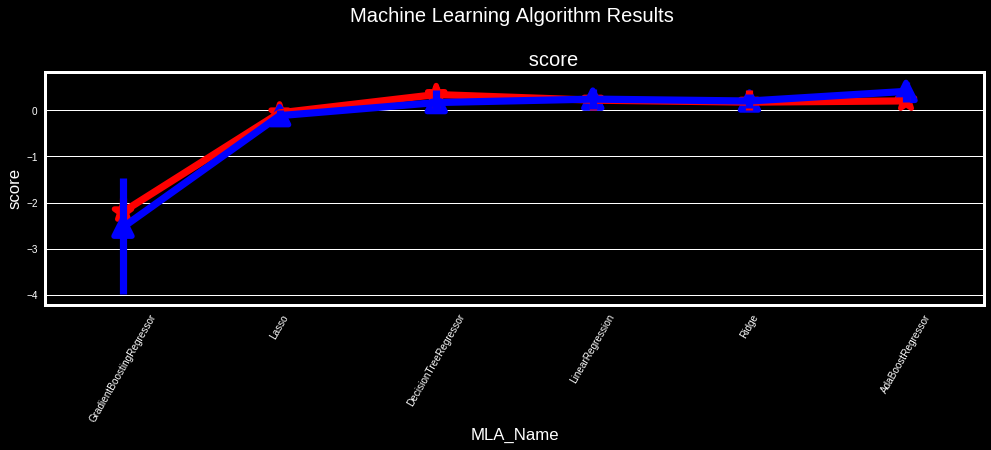

In [1054]:
plt.style.use(['dark_background'])

plt.figure(figsize=(15,4))

sns.pointplot(y='score', x ='MLA_Name', data =REG_COMPARE.loc[['df_KM_4_0','df_KM_4_1','df_KM_4_2','df_KM_4_3'],:].sort_values(by='score') , color = 'r',markers=["*"],label = 'score')
sns.pointplot(y='score', x ='MLA_Name', data =REG_COMPARE.loc[['df_wdAG_4_0','df_wdAG_4_1','df_wdAG_4_2','df_wdAG_4_3'],:].sort_values(by='score') , color = 'blue',markers=["^"],label = 'score')

plt.title('Machine Learning Algorithm Results \n\n              score')
plt.xlabel('MLA_Name')
plt.ylabel('score')
plt.xticks(rotation=60)
#plt.legend(loc='bottom left', frameon=False)

In [0]:
## with adaboost regressor we have high score for the Agglomerative clusters

No handles with labels found to put in legend.


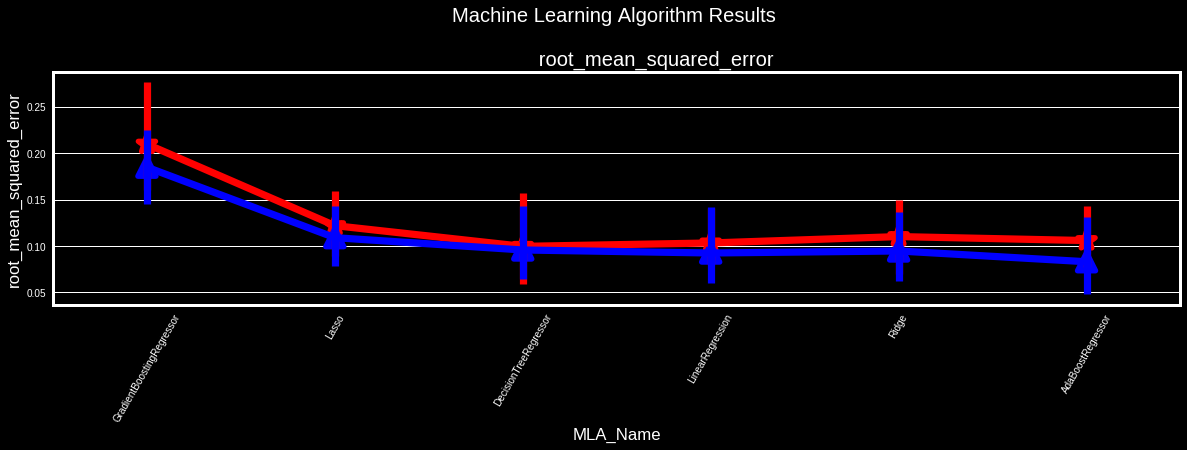

In [1056]:
plt.style.use(['dark_background'])

plt.figure(figsize=(18,4))
sns.pointplot(y='root_mean_squared_error', x ='MLA_Name', data =REG_COMPARE.loc[['df_KM_4_0','df_KM_4_1','df_KM_4_2','df_KM_4_3'],:].sort_values(by='score') , color = 'r',markers=["*"],label = 'KMEAN')
sns.pointplot(y='root_mean_squared_error', x ='MLA_Name', data =REG_COMPARE.loc[['df_wdAG_4_0','df_wdAG_4_1','df_wdAG_4_2','df_wdAG_4_3'],:].sort_values(by='score') , color = 'blue',markers=["^"],label = 'WARD')

plt.title('Machine Learning Algorithm Results \n\n              root_mean_squared_error')
plt.xlabel('MLA_Name')
plt.ylabel('root_mean_squared_error')
plt.xticks(rotation=60)
plt.legend()

In [0]:
## with adaboost regressor we have minimum RMSE  for the Agglomerative clusters

In [0]:
########################### LINEAR REGRESSION MODEL ##################################################################################################

In [1059]:
LIN_REG_COMPARE

Dataset_Name  Actual_Y_Shape  ... mean_squared_error  root_mean_squared_error
0     df_KM_4_0            29.0  ...           0.008489                 0.092134
6     df_KM_4_1            27.0  ...           0.006601                 0.081249
12    df_KM_4_2            36.0  ...           0.026128                 0.161640
18    df_KM_4_3            30.0  ...           0.006131                 0.078301
24  df_wdAG_4_0            31.0  ...           0.004396                 0.066305
30  df_wdAG_4_1            36.0  ...           0.027769                 0.166642
36  df_wdAG_4_2            23.0  ...           0.002937                 0.054198
42  df_wdAG_4_3            31.0  ...           0.006872                 0.082896

[8 rows x 10 columns]

In [0]:
#########################################################  F I N I S H ######################################################################